In [2]:
import pandas as pd
import seaborn as sns
import pickle
import math
import matplotlib.pyplot as plt
import numpy as np
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
from scipy import stats
import matplotlib as mpl

no_exe=False

plt.style.use('seaborn-colorblind')

mpl.rcParams['font.size'] = 22

In [3]:
path_file=r'.'
df = pickle.load(open(path_file+'/dblp-with-cite.p','rb'))

In [4]:
df

,address,authors,booktitle,cdrom,chapter,cite,crossref,editor,ee,isbn,...,publisher,publnr,school,series,title,type,url,volume,year,CIT
0,,,,,,,conf/acl/2014-2,,https://www.aclweb.org/anthology/P14-2037/,,...,,,,,Learning Bilingual Word Representations by Mar...,,db/conf/acl/acl2014-2.html#KociskyHB14,,2014,-1
1,,,,,,,conf/acl/2012-2,,https://www.aclweb.org/anthology/P12-2017/,,...,,,,,Using Rejuvenation to Improve Particle Filteri...,,db/conf/acl/acl2012-2.html#BorschingerJ12,,2012,-1
2,,Anssi Yli-Jyrä,,,,,conf/acl/2017-1,,https://doi.org/10.18653/v1/P17-1160,,...,,,,,Generic Axiomatization of Families of Noncross...,,db/conf/acl/acl2017-1.html#Yli-JyraG17,,2017,0
3,,,,,,,conf/acl/1989,,https://www.aclweb.org/anthology/P89-1018/,,...,,,,,The Structure of Shared Forests in Ambiguous P...,,db/conf/acl/acl1989.html#BillotL89,,1989,-1
4,,,,,,,conf/acl/1991,,https://www.aclweb.org/anthology/P91-1015/,,...,,,,,Head Corner Parsing for Discontinuous Constitu...,,db/conf/acl/acl91.html#Noord91,,1991,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,,"Kim Steenstrup Pedersen,Kristoffer Stensbo-Smidt",,,,,conf/iccv/2013,,"https://doi.org/10.1109/ICCV.2013.303,http://d...",,...,,,,,Shape Index Descriptors Applied to Texture-Bas...,,db/conf/iccv/iccv2013.html#PedersenSZI13,,2013,-1
9996,,Chong-Wah Ngo,,,,,conf/iccv/2009,,"https://doi.org/10.1109/ICCV.2009.5459295,http...",,...,,,,,Domain adaptive semantic diffusion for large s...,,db/conf/iccv/iccv2009.html#JiangWCN09,,2009,-1
9997,,,,,,,conf/iccv/2013,,"https://doi.org/10.1109/ICCV.2013.217,http://d...",,...,,,,,Predicting an Object Location Using a Global I...,,db/conf/iccv/iccv2013.html#Rodriguez-SerranoL13,,2013,-1
9998,,,,,,,conf/iccv/2013,,"https://doi.org/10.1109/ICCV.2013.29,http://do...",,...,,,,,Higher Order Matching for Consistent Multiple ...,,db/conf/iccv/iccv2013.html#AroraG13,,2013,-1


In [5]:
df = df[df['CIT']>-1]

df = df[df['year']<str(2018)]

df_groupby_year = df.groupby(['year']).CIT.count()
print(df_groupby_year)

df = df[df['year']>str(1984)]

df = df[df['crossref']!='']

year
1960         9
1961        26
1962        16
1963        13
1964        42
1965        51
1966       157
1967       242
1968       287
1969       299
1970       259
1971       297
1972       563
1973       729
1974      1092
1975       967
1976      1197
1977       842
1978      1261
1979      1337
1980      1635
1981      1625
1982      1790
1983      1799
1984      2501
1985      2562
1986      3045
1987      3692
1988      5627
1989      6800
1990      8472
1991      8978
1992     10003
1993     11418
1994     15565
1995     16576
1996     17972
1997     20381
1998     23128
1999     25377
2000     29245
2001     32403
2002     38366
2003     44920
2004     57753
2005     70444
2006     81955
2007     87502
2008     91947
2009     98647
2010    102431
2011    114900
2012    118111
2013    124684
2014    129896
2015    133604
2016    132121
2017    138197
Name: CIT, dtype: int64


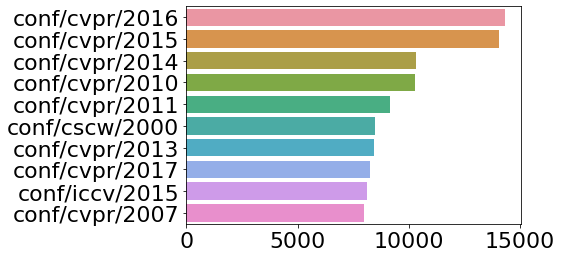

In [6]:
top10 = {v:k for v,k in df.groupby(['crossref']).CIT.sum().sort_values(ascending=False).head(10).items()}
top10_plot = sns.barplot(x=list(top10.values()), y=list(top10.keys()))

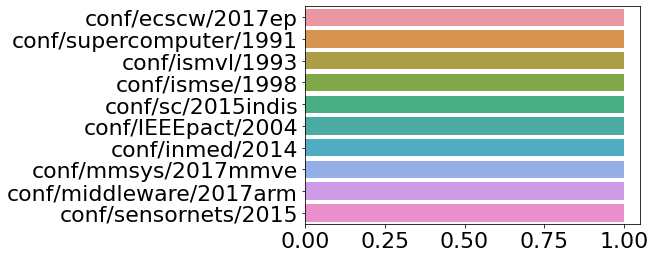

In [7]:
flop10 = {v:k for v,k in df[df['CIT']>0].groupby(['crossref']).CIT.sum().sort_values().head(10).items()}
flop10_plot = sns.barplot(x=list(flop10.values()), y=list(flop10.keys()))

In [8]:
single_conference_cit = df.groupby(['crossref']).CIT.sum().sort_values(ascending=False)
single_conference_count_article = df.groupby(['crossref']).CIT.count().sort_values(ascending=False)

single_conference_avg_cit = {key:(int(val)/int(single_conference_count_article[key])) for key,val in single_conference_cit.items()}

single_conference = {k:[v,single_conference_avg_cit[k],single_conference_count_article[k]] for k,v in single_conference_cit.items()}
df_single_conference = pd.DataFrame(data=single_conference.values(), index=single_conference.keys(), columns=['CIT TOT', 'CIT AVG', 'N.ARTICLES'])
df_single_conference = df_single_conference.sort_values('CIT AVG', ascending=False)
df_single_conference.head(10)

,CIT TOT,CIT AVG,N.ARTICLES
conf/cscw/2000,8471,162.903846,52
conf/mobicom/2000,3566,127.357143,28
conf/crypto/2001,3947,119.606061,33
conf/wmcsa/1999,1429,119.083333,12
conf/eurocrypt/2005,3804,115.272727,33
conf/eurocrypt/2004,3935,109.305556,36
conf/crypto/1999,3995,102.435897,39
conf/sigcomm/2001,2266,98.521739,23
conf/adaptive/2007,2074,86.416667,24
conf/sosp/2003,1805,82.045455,22


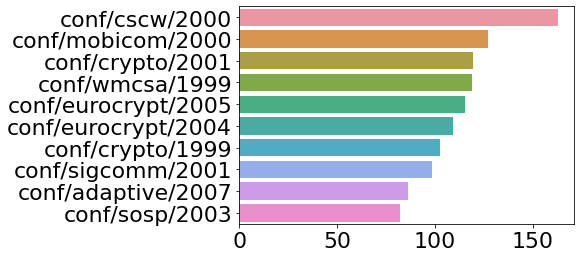

In [9]:
top10_avg = {k:v for k,v in df_single_conference['CIT AVG'].sort_values(ascending=False).head(10).items()}
top10_avg_plot = sns.barplot(x=list(top10_avg.values()), y=list(top10_avg.keys()))

/Users/lbedogni/repo/conference-touristicity/p3venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


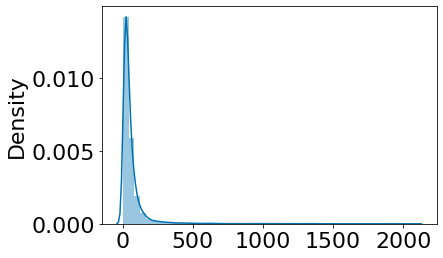

In [10]:
article_by_conference_plot = sns.distplot([v for k,v in single_conference_count_article.items()])
avg_article_by_conference = sum([v for k,v in single_conference_count_article.items()])/len(single_conference_count_article)

In [11]:
df[['conf','cod', 'anno']] = df.crossref.str.split("/",expand=True,)

conference_tot_cit = df.groupby(['cod']).CIT.sum()
conference_tot_article = df.groupby(['cod']).CIT.count()
avg_cit_for_conference = {key:(int(val)/int(conference_tot_article[key])) for key,val in conference_tot_cit.items()}

conference = {k:[v,avg_cit_for_conference[k],conference_tot_article[k]] for k,v in conference_tot_cit.items()}
df_conference = pd.DataFrame(data=conference.values(), index=conference.keys(), columns=['CIT TOT', 'CIT AVG', 'N.ARTICLES'])
df_conference = df_conference.sort_values(['CIT AVG'], ascending=False)
df_conference.head(10)

,CIT TOT,CIT AVG,N.ARTICLES
adaptive,2074,86.416667,24
diau,789,71.727273,11
banff,226,45.200000,5
crypto,59794,41.872549,1428
eurocrypt,52855,40.347328,1310
ismb,10875,35.655738,305
mobidata,920,35.384615,26
mas,445,34.230769,13
iptps,3177,28.366071,112
ches,15108,24.848684,608


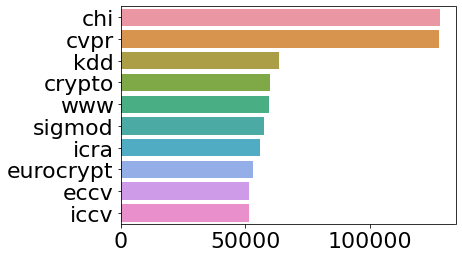

In [12]:
top10_conference_by_cit ={k:v for k,v in df_conference['CIT TOT'].sort_values(ascending=False).head(10).items()}
top10_conference_by_cit_plot = sns.barplot(x=list(top10_conference_by_cit.values()), y=list(top10_conference_by_cit.keys()))

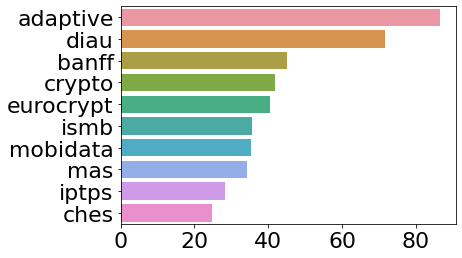

In [13]:
top10_conference_by_avgCit ={k:v for k,v in df_conference['CIT AVG'].sort_values(ascending=False).head(10).items()}
top10_conference_by_avgCit_plot = sns.barplot(x=list(top10_conference_by_avgCit.values()), y=list(top10_conference_by_avgCit.keys()))

In [14]:
lst_dataframes = []
conference_tot_cit = df.groupby(['cod','year']).CIT.sum()
conference_tot_article = df.groupby(['cod','year']).CIT.count()
keys = df.groupby(['cod']).CIT.count().keys()
for conference in keys:
    single_conference = {}
    tot_cit = 0
    tot_article = 0
    n_editions = 0
    for k,v in conference_tot_cit[conference].items():
        single_conference[str(k)+'-CIT'] = v   
        single_conference[str(k)+'-AVG'] = v/conference_tot_article[conference][k] 
        tot_cit += v 
        tot_article += conference_tot_article[conference][k]
        n_editions += 1 
    single_conference['tot_cit'] = tot_cit
    single_conference['avg_cit'] = tot_cit/tot_article
    single_conference['n_editions'] = n_editions

    lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

df_conf_evolution = pd.concat(lst_dataframes)

df_conf_evolution = df_conf_evolution.reindex(sorted(df_conf_evolution.columns), axis=1)

df_conf_evolution = df_conf_evolution.sort_values(['n_editions'], ascending=False)
df_conf_evolution.head(10)
df_conf_evolution

,1985-AVG,1985-CIT,1986-AVG,1986-CIT,1987-AVG,1987-CIT,1988-AVG,1988-CIT,1989-AVG,1989-CIT,...,2014-CIT,2015-AVG,2015-CIT,2016-AVG,2016-CIT,2017-AVG,2017-CIT,avg_cit,n_editions,tot_cit
sigir,5.500000,176.0,4.085714,143.0,2.468750,79.0,4.533333,204.0,4.111111,111.0,...,2012.0,8.114428,1631.0,5.179487,1212.0,3.560784,908.0,12.343552,33,48720
sigmod,6.000000,240.0,16.135135,597.0,16.644444,749.0,10.057692,523.0,19.357143,813.0,...,2380.0,10.200980,2081.0,5.111538,1329.0,3.233184,721.0,15.943721,33,57509
stacs,2.666667,96.0,3.433333,103.0,6.404255,301.0,2.651163,114.0,2.686275,137.0,...,1.0,0.049180,3.0,0.101695,6.0,0.033898,2.0,3.725943,33,6621
compgeom,7.804878,320.0,9.058824,308.0,8.184211,311.0,8.600000,344.0,6.883721,296.0,...,186.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.732265,33,8272
apn,5.166667,124.0,11.625000,186.0,5.750000,115.0,6.318182,139.0,18.944444,341.0,...,87.0,3.588235,61.0,2.000000,38.0,1.052632,20.0,7.096654,33,5727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iwwiss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,0.880000,1,22
iwvf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.328767,1,170
iwsls2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.500000,6.0,NaN,NaN,0.500000,1,6
iwsg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,1.733333,1,26


In [15]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k,v in conference_tot_cit[conference].items():
        single_conference[str(k)] = v/conference_tot_article[conference][k] 
        n_editions +=1
    
    if n_editions>1:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

avg_cit_evolution = pd.concat(lst_dataframes)

avg_cit_evolution = avg_cit_evolution.reindex(sorted(avg_cit_evolution.columns), axis=1)
avg_cit_evolution.head(10)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.469136,1.136364,0.462963,NaN,0.741573,0.478261,0.375000,0.125000,NaN
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.764706,NaN,0.870968,2.111111,1.428571,0.645161,0.200000,0.200000,NaN,NaN
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.833333,3.800000,6.142857,1.733333,1.297297,5.640000,1.424658
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.066667,0.000000,0.045455,0.066667,0.111111
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.666667,0.620690,0.606557,0.392857,0.458333,0.290323
3dui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.216216,2.694444,3.794118,2.416667,2.500000,1.825397,2.722222,1.339286,2.000000,1.830769
3pgcic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.096774,1.074627,0.965517,1.457627,0.669725,0.575163,0.258065,0.227848
ACISicis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.645455,0.863415,0.972973,0.925373,0.672727,0.595960,0.602273,0.686957,0.635193,0.546012
ACMace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.621622,1.908163,1.891892,3.372340,1.925373,1.948052,2.356322,1.424242,1.037736,0.593220


In [16]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k,v in conference_tot_cit[conference].items():
        single_conference[str(k)] = v 
        n_editions += 1
        
    if n_editions >1:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

cit_evolution = pd.concat(lst_dataframes)

cit_evolution = cit_evolution.reindex(sorted(cit_evolution.columns), axis=1)
cit_evolution.head(10)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,200.0,75.0,50.0,NaN,66.0,22.0,30.0,6.0,NaN
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,NaN,27.0,95.0,70.0,20.0,3.0,5.0,NaN,NaN
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,207.0,285.0,344.0,182.0,96.0,423.0,104.0
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.0,18.0,37.0,11.0,11.0,9.0
3dui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,97.0,129.0,87.0,125.0,115.0,147.0,75.0,114.0,119.0
3pgcic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,102.0,72.0,56.0,172.0,73.0,88.0,24.0,18.0
ACISicis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181.0,177.0,144.0,62.0,74.0,59.0,53.0,79.0,148.0,89.0
ACMace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,291.0,187.0,70.0,317.0,129.0,150.0,205.0,94.0,55.0,35.0


In [17]:
over_and_under_avg_cit = {}
for row,col in avg_cit_evolution.iterrows():
    maggiori = []
    minori = []
    for k,v in col.items():
        if not math.isnan(v):
            if(v >= df_conference.at[row,'CIT AVG']):
                maggiori.append(k)
            else:
                minori.append(k)
    x = {}
    x['confSottoLaMedia']= minori
    x['confSopraLaMedia']= maggiori
    over_and_under_avg_cit[row] = x

In [18]:
lst_df = []
for k,v in over_and_under_avg_cit.items():
    v['%confSottoLaMedia'] = (len(v['confSottoLaMedia'])/df_conf_evolution.at[k,'n_editions'])*100
    lst_df.append(pd.DataFrame(data=[v.values()], index = [k], columns=v.keys()))
    
df_over_and_under_avg_cit = pd.concat(lst_df)
df_over_and_under_avg_cit = df_over_and_under_avg_cit.sort_values(['%confSottoLaMedia'], ascending=False)
df_over_and_under_avg_cit.head(10)

,confSottoLaMedia,confSopraLaMedia,%confSottoLaMedia
vast,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...",[2001],92.857143
ccia,"[2008, 2009, 2010, 2011, 2012, 2013, 2014, 201...",[2002],90.909091
tamc,"[2006, 2007, 2009, 2010, 2011, 2012, 2013, 201...",[2008],90.909091
jurix,"[2008, 2010, 2011, 2012, 2013, 2014, 2015, 201...",[2009],90.000000
egItaly,"[2006, 2007, 2010, 2011, 2014, 2015, 2016, 2017]",[2008],88.888889
egve,"[2000, 2001, 2002, 2003, 2004, 2005, 2008, 200...","[2006, 2007]",88.888889
atmos,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]",[2004],88.888889
fit,"[2009, 2010, 2011, 2013, 2014, 2015, 2016]",[2012],87.500000
egh,"[1986, 1987, 1988, 1989, 1990, 1991, 1992, 199...","[2011, 2013, 2015, 2017]",87.096774
iwinac,"[2007, 2009, 2011, 2013, 2015, 2017]",[2005],85.714286


In [19]:
dict_avg_cit_conference = {}
for row,col in avg_cit_evolution.iterrows():
    x = {}
    for k,v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_avg_cit_conference[row] = x

In [20]:
dict_cit_conference = {}
for row,col in cit_evolution.iterrows():
    x = {}
    for k,v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_cit_conference[row] = x

In [21]:
def draw_avg_cit_graph(conf_name):
    plot = sns.barplot(x=list(dict_avg_cit_conference[conf_name].keys()), y=list(dict_avg_cit_conference[conf_name].values()))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
    plot.set_title(conf_name)
    plot.set(xlabel='Year', ylabel='Average Citation Number')
    plot.axhline(df_conference.at[conf_name,'CIT AVG'], ls='--')
    #plot.text(0.5,int(df_conference.at[conf_name,'CIT AVG'])+0.2, "total avg")
    plt.savefig(f'charts/example_avg_{conf_name}.png')

In [22]:
def draw_tot_cit_graph(conf_name):
    plot = sns.barplot(x=list(dict_cit_conference[conf_name].keys()), y=list(dict_cit_conference[conf_name].values()))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
    plot.set_title(conf_name)
    plot.set(xlabel='Year', ylabel='Total Citation Number')
    plt.savefig(f'charts/example_tot_{conf_name}.png')

In [23]:
print('TOP 10 Total Citation: ' + str(list(top10_conference_by_cit.keys())))
print('TOP 10 Average Citation: ' + str(list(top10_conference_by_avgCit.keys())))

top10_num_editions ={k:v for k,v in df_conf_evolution['n_editions'].sort_values(ascending=False).head(10).items()}
print('TOP 10 number of editions: ' + str(list(top10_num_editions.keys())))

TOP 10 Total Citation: ['chi', 'cvpr', 'kdd', 'crypto', 'www', 'sigmod', 'icra', 'eurocrypt', 'eccv', 'iccv']
TOP 10 Average Citation: ['adaptive', 'diau', 'banff', 'crypto', 'eurocrypt', 'ismb', 'mobidata', 'mas', 'iptps', 'ches']
TOP 10 number of editions: ['sigir', 'focs', 'sigmod', 'icalp', 'siggraph', 'sigmetrics', 'sp', 'podc', 'fsttcs', 'crypto']


In [24]:
avg_cit_evolution

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.469136,1.136364,0.462963,NaN,0.741573,0.478261,0.375000,0.125000,NaN
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.764706,NaN,0.870968,2.111111,1.428571,0.645161,0.200000,0.200000,NaN,NaN
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.833333,3.800000,6.142857,1.733333,1.297297,5.640000,1.424658
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.066667,0.000000,0.045455,0.066667,0.111111
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.521739,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xpu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.688889,1.419355,1.553571,1.774194,5.933333,1.882353,2.627907,3.659091,1.396552,2.063830
xsede,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.824324,1.324675,2.068182,1.305085,1.392405
xsym,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.066667,1.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


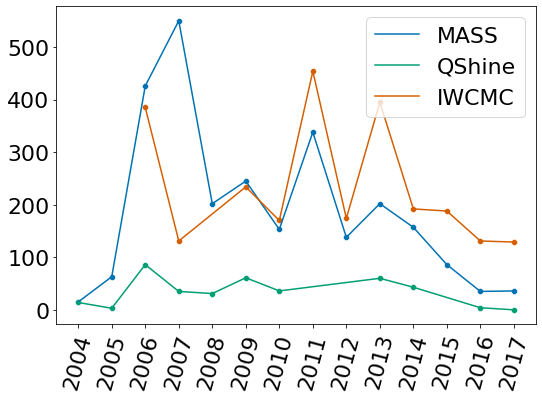

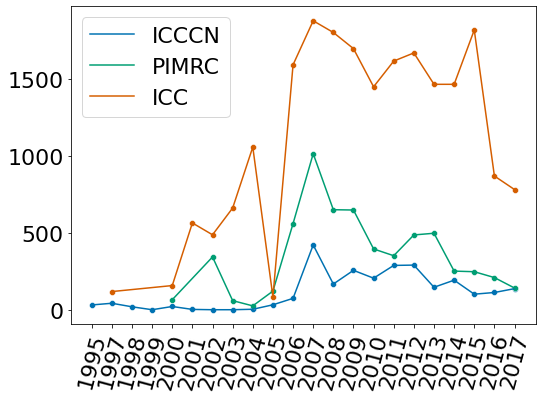

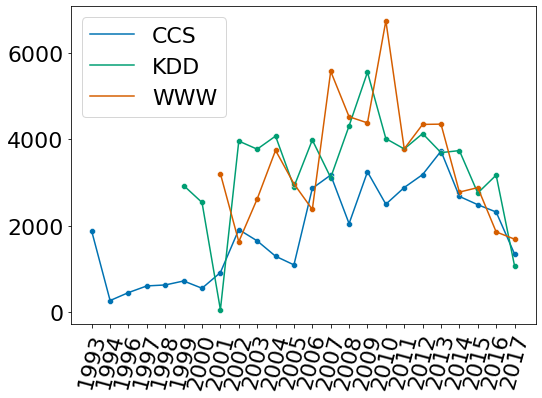

In [25]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['mass'].keys()), y=list(dict_cit_conference['mass'].values()),label='MASS')
sns.lineplot(x=list(dict_cit_conference['qshine'].keys()), y=list(dict_cit_conference['qshine'].values()),label='QShine')
sns.lineplot(x=list(dict_cit_conference['iwcmc'].keys()), y=list(dict_cit_conference['iwcmc'].values()),label='IWCMC')
sns.scatterplot(x=list(dict_cit_conference['mass'].keys()), y=list(dict_cit_conference['mass'].values()))
sns.scatterplot(x=list(dict_cit_conference['qshine'].keys()), y=list(dict_cit_conference['qshine'].values()))
sns.scatterplot(x=list(dict_cit_conference['iwcmc'].keys()), y=list(dict_cit_conference['iwcmc'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('charts/conf_tot_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['icccn'].keys()), y=list(dict_cit_conference['icccn'].values()),label='ICCCN')
sns.lineplot(x=list(dict_cit_conference['pimrc'].keys()), y=list(dict_cit_conference['pimrc'].values()),label='PIMRC')
sns.lineplot(x=list(dict_cit_conference['icc'].keys()), y=list(dict_cit_conference['icc'].values()),label='ICC')
sns.scatterplot(x=list(dict_cit_conference['icccn'].keys()), y=list(dict_cit_conference['icccn'].values()))
sns.scatterplot(x=list(dict_cit_conference['pimrc'].keys()), y=list(dict_cit_conference['pimrc'].values()))
sns.scatterplot(x=list(dict_cit_conference['icc'].keys()), y=list(dict_cit_conference['icc'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('charts/conf_tot_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['ccs'].keys()), y=list(dict_cit_conference['ccs'].values()),label='CCS')
sns.lineplot(x=list(dict_cit_conference['kdd'].keys()), y=list(dict_cit_conference['kdd'].values()),label='KDD')
sns.lineplot(x=list(dict_cit_conference['www'].keys()), y=list(dict_cit_conference['www'].values()),label='WWW')
sns.scatterplot(x=list(dict_cit_conference['ccs'].keys()), y=list(dict_cit_conference['ccs'].values()))
sns.scatterplot(x=list(dict_cit_conference['kdd'].keys()), y=list(dict_cit_conference['kdd'].values()))
sns.scatterplot(x=list(dict_cit_conference['www'].keys()), y=list(dict_cit_conference['www'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('charts/conf_tot_a.png')

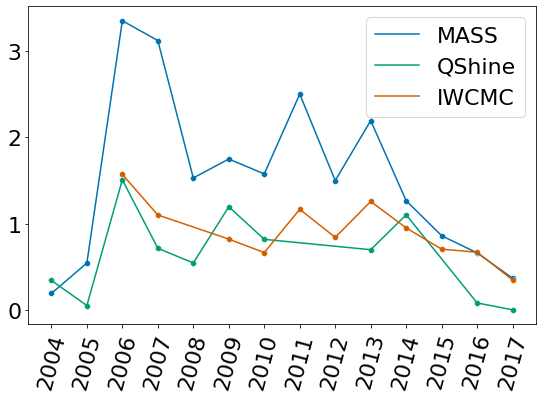

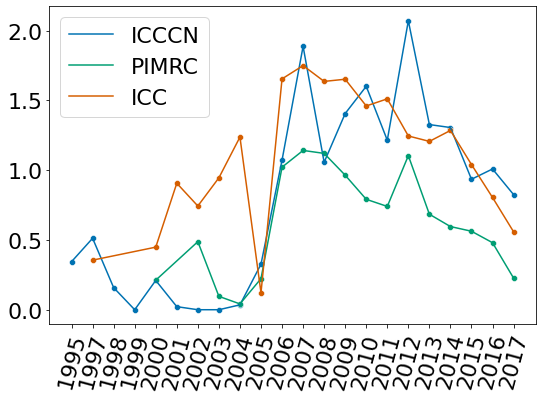

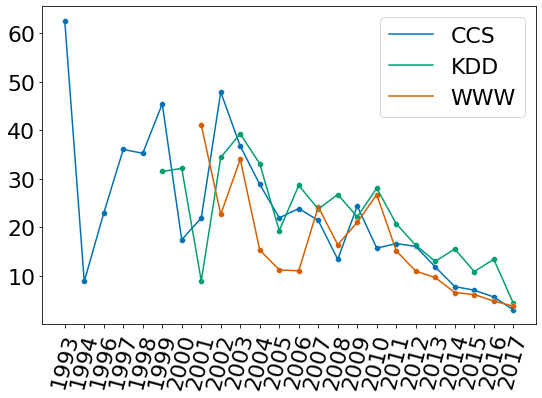

In [26]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['mass'].keys()), y=list(dict_avg_cit_conference['mass'].values()),label='MASS')
sns.lineplot(x=list(dict_avg_cit_conference['qshine'].keys()), y=list(dict_avg_cit_conference['qshine'].values()),label='QShine')
sns.lineplot(x=list(dict_avg_cit_conference['iwcmc'].keys()), y=list(dict_avg_cit_conference['iwcmc'].values()),label='IWCMC')
sns.scatterplot(x=list(dict_avg_cit_conference['mass'].keys()), y=list(dict_avg_cit_conference['mass'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['qshine'].keys()), y=list(dict_avg_cit_conference['qshine'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['iwcmc'].keys()), y=list(dict_avg_cit_conference['iwcmc'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('charts/conf_avg_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['icccn'].keys()), y=list(dict_avg_cit_conference['icccn'].values()),label='ICCCN')
sns.lineplot(x=list(dict_avg_cit_conference['pimrc'].keys()), y=list(dict_avg_cit_conference['pimrc'].values()),label='PIMRC')
sns.lineplot(x=list(dict_avg_cit_conference['icc'].keys()), y=list(dict_avg_cit_conference['icc'].values()),label='ICC')
sns.scatterplot(x=list(dict_avg_cit_conference['icccn'].keys()), y=list(dict_avg_cit_conference['icccn'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['pimrc'].keys()), y=list(dict_avg_cit_conference['pimrc'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['icc'].keys()), y=list(dict_avg_cit_conference['icc'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('charts/conf_avg_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['ccs'].keys()), y=list(dict_avg_cit_conference['ccs'].values()),label='CCS')
sns.lineplot(x=list(dict_avg_cit_conference['kdd'].keys()), y=list(dict_avg_cit_conference['kdd'].values()),label='KDD')
sns.lineplot(x=list(dict_avg_cit_conference['www'].keys()), y=list(dict_avg_cit_conference['www'].values()),label='WWW')
sns.scatterplot(x=list(dict_avg_cit_conference['ccs'].keys()), y=list(dict_avg_cit_conference['ccs'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['kdd'].keys()), y=list(dict_avg_cit_conference['kdd'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['www'].keys()), y=list(dict_avg_cit_conference['www'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('charts/conf_avg_a.png')

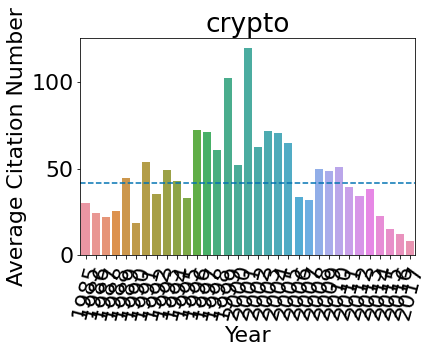

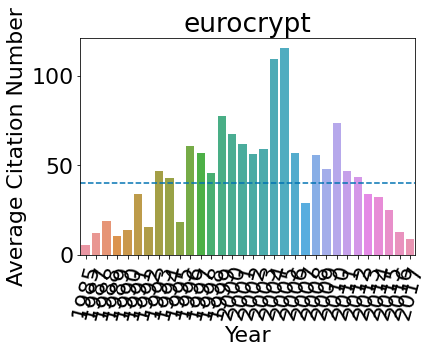

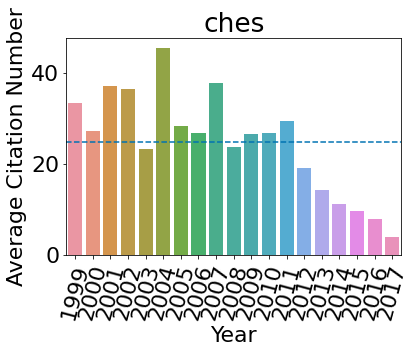

In [27]:
for key in top10_conference_by_avgCit.keys():
    if(df_conf_evolution.at[key,'n_editions']>5):
        plt.figure(key)
        draw_avg_cit_graph(key)

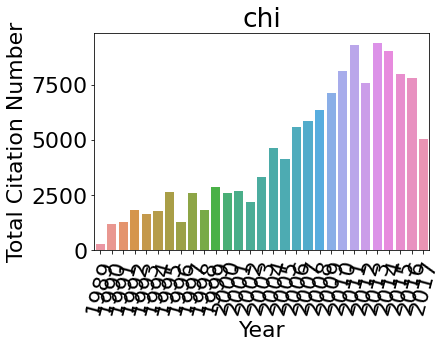

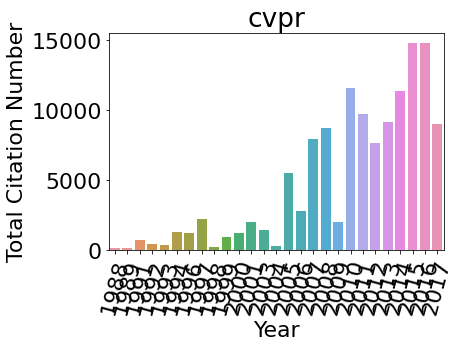

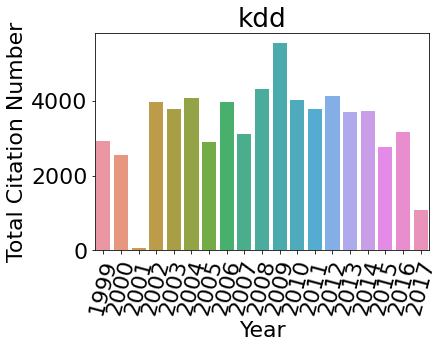

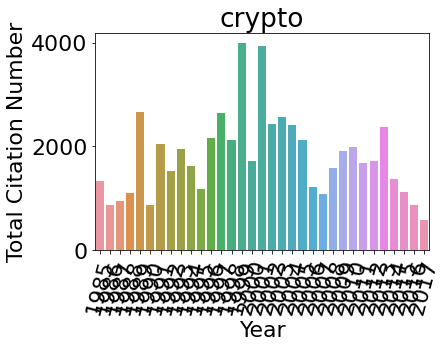

In [28]:
for key in list(top10_conference_by_cit.keys())[0:4]:
    plt.figure(key)
    draw_tot_cit_graph(key)

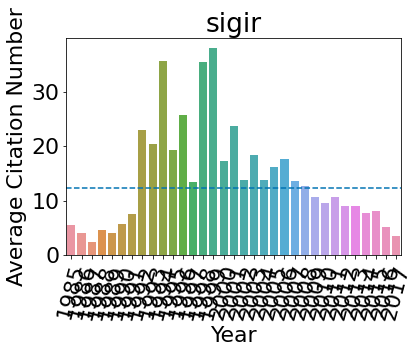

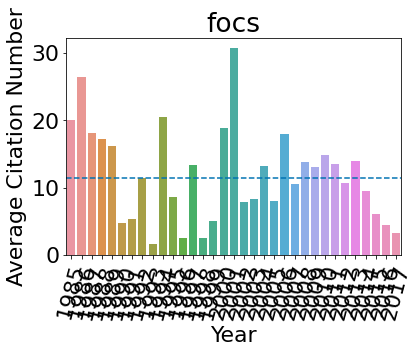

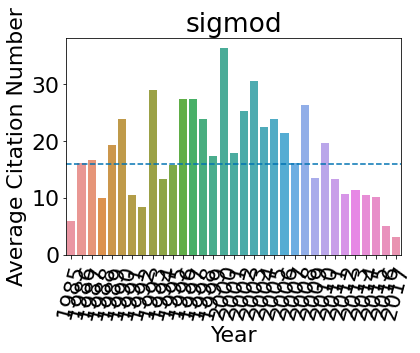

In [29]:
for key in list(top10_num_editions.keys())[0:3]:
    plt.figure(key)
    draw_avg_cit_graph(key)

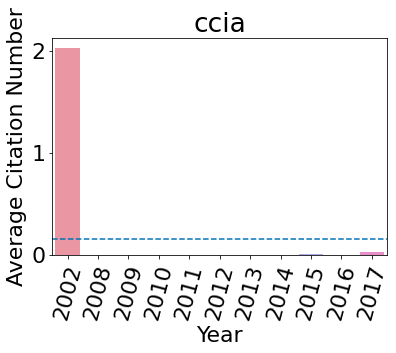

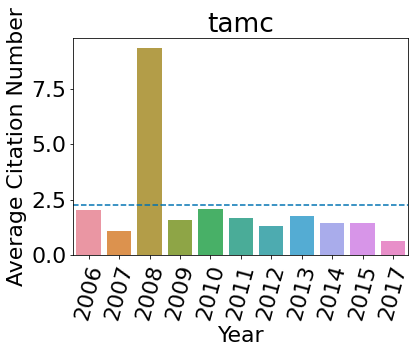

In [30]:
for row,col in list(df_over_and_under_avg_cit.iterrows())[1:3]:
    plt.figure(row)
    draw_avg_cit_graph(row)

In [31]:
year_with_min_avg_cit = {k:v for k,v in avg_cit_evolution.idxmin(axis=1).items()}
df_year_with_min_avg_cit = pd.DataFrame(data=year_with_min_avg_cit.values(), index=year_with_min_avg_cit.keys(), columns=['MIN AVG-year'])

min_avg_cit = {k:v for k,v in avg_cit_evolution.min(axis=1).items()}
df_min_avg_cit = pd.DataFrame(data=min_avg_cit.values(), index=min_avg_cit.keys(), columns=['MIN AVG-value'])

year_with_min_cit = {k:v for k,v in cit_evolution.idxmin(axis=1).items()}
df_year_with_min_cit = pd.DataFrame(data=year_with_min_cit.values(), index=year_with_min_cit.keys(), columns=['MIN CIT-year'])

min_cit = {k:v for k,v in cit_evolution.min(axis=1).items()}
df_min_cit = pd.DataFrame(data=min_cit.values(), index=min_cit.keys(), columns=['MIN CIT-value'])

year_with_max_avg_cit = {k:v for k,v in avg_cit_evolution.idxmax(axis=1).items()}
df_year_with_max_avg_cit = pd.DataFrame(data=year_with_max_avg_cit.values(), index=year_with_max_avg_cit.keys(), columns=['MAX AVG-year'])

max_avg_cit = {k:v for k,v in avg_cit_evolution.max(axis=1).items()}
df_max_avg_cit = pd.DataFrame(data=max_avg_cit.values(), index=max_avg_cit.keys(), columns=['MAX AVG-value'])

year_with_max_cit = {k:v for k,v in cit_evolution.idxmax(axis=1).items()}
df_year_with_max_cit = pd.DataFrame(data=year_with_max_cit.values(), index=year_with_max_cit.keys(), columns=['MAX CIT-year'])

max_cit = {k:v for k,v in cit_evolution.max(axis=1).items()}
df_max_cit = pd.DataFrame(data=max_cit.values(), index=max_cit.keys(), columns=['MAX CIT-value'])

dif_cit = {k:(max_cit[k]-v)  for k,v in min_cit.items()}
df_dif_cit = pd.DataFrame(data=dif_cit.values(), index=dif_cit.keys(), columns=['DIF CIT'])
dif_avg_cit = {k:(max_avg_cit[k]-v)  for k,v in min_avg_cit.items()}
df_dif_avg_cit = pd.DataFrame(data=dif_avg_cit.values(), index=dif_avg_cit.keys(), columns=['DIF AVG CIT'])

df_min_max = pd.concat([df_year_with_min_avg_cit, df_min_avg_cit, df_year_with_max_avg_cit, df_max_avg_cit, 
                       df_year_with_min_cit, df_min_cit, df_year_with_max_cit, df_max_cit, df_dif_avg_cit, df_dif_cit],axis=1)
df_min_max = df_min_max.sort_values(['DIF AVG CIT'], ascending=False)
df_min_max.head(10)

,MIN AVG-year,MIN AVG-value,MAX AVG-year,MAX AVG-value,MIN CIT-year,MIN CIT-value,MAX CIT-year,MAX CIT-value,DIF AVG CIT,DIF CIT
cscw,1986,4.142857,2000,162.903846,1986,145.0,2000,8471.0,158.760989,8326.0
mobicom,2017,1.237374,2000,127.357143,1996,156.0,2000,3566.0,126.119769,3410.0
wmcsa,2006,0.458333,1999,119.083333,2006,11.0,1999,1429.0,118.625000,1418.0
crypto,2017,8.194444,2001,119.606061,2017,590.0,1999,3995.0,111.411616,3405.0
eurocrypt,1985,5.468750,2005,115.272727,1985,175.0,2004,3935.0,109.803977,3760.0
sigcomm,1985,0.815789,2001,98.521739,1985,31.0,2013,2346.0,97.705950,2315.0
sosp,2017,5.631579,2003,82.045455,1985,141.0,2003,1805.0,76.413876,1664.0
middleware,2017,1.178082,2001,64.150000,2016,81.0,2001,1283.0,62.971918,1202.0
ecoop,2017,0.240000,1997,61.521739,2017,12.0,1997,1415.0,61.281739,1403.0
ccs,2017,3.049661,1993,62.566667,1994,275.0,2013,3726.0,59.517005,3451.0


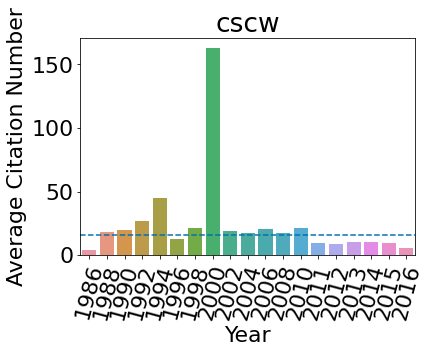

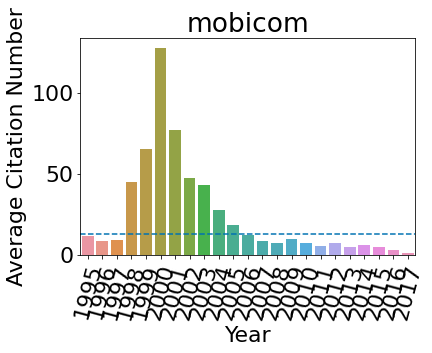

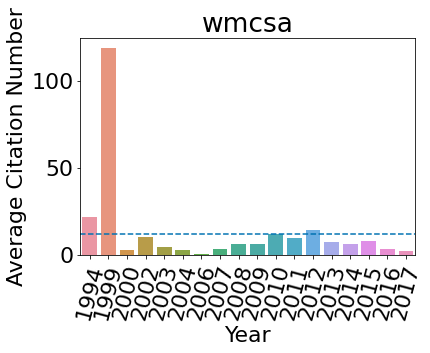

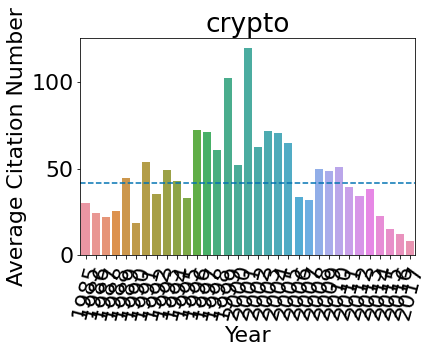

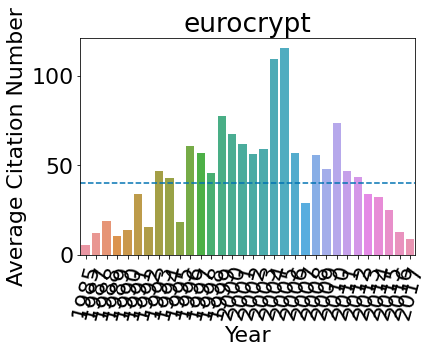

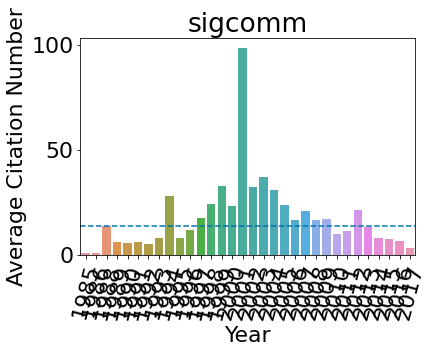

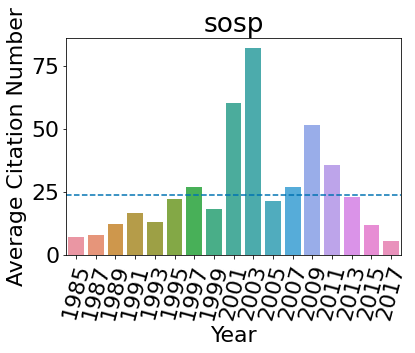

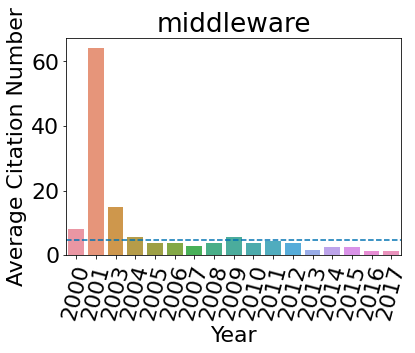

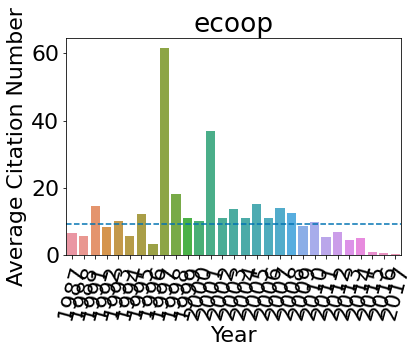

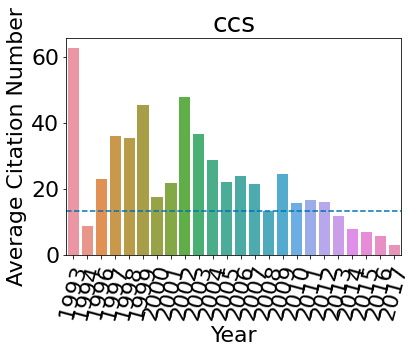

In [32]:
for row,col in list(df_min_max.head(10).iterrows())[0:10]:
    plt.figure(row)
    draw_avg_cit_graph(row)


In [33]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k,v in conference_tot_cit[conference].items():
        avg_cit = v/conference_tot_article[conference][k]
        if(df_conf_evolution.at[conference,'avg_cit']!=0):
            single_conference[k] = avg_cit/df_conf_evolution.at[conference,'avg_cit']
        else:
            single_conference[k] = 0
        n_editions +=1
    single_conference['tot avg'] = df_conf_evolution.at[conference,'avg_cit']

    if n_editions>1:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

df_ratio = pd.concat(lst_dataframes)

df_ratio = df_ratio.reindex(sorted(df_ratio.columns), axis=1)
df_ratio.head(10)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,tot avg
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.848580,1.310994,0.534109,NaN,0.855534,0.551758,0.432628,0.144209,NaN,0.866795
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.634925,1.538975,1.041411,0.470315,0.145798,0.145798,NaN,NaN,1.371765
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.280777,1.269640,2.052426,0.579134,0.433448,1.884413,0.476001,2.992974
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,2.571429,0.000000,1.542857,0.000000,1.051948,1.542857,2.571429,0.043210
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.202439
3dtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.236559,1.151279,1.125066,0.728687,0.850134,0.538502,0.539130
3dui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.201727,1.692183,1.077837,1.115004,0.814130,1.214116,0.597324,0.892003,0.816526,2.242144
3pgcic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.395894,1.367707,1.228840,1.855162,0.852377,0.732026,0.328446,0.289988,0.785714
ACISicis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.108091,1.248697,1.187608,0.863367,0.764844,0.772946,0.881628,0.815196,0.700743,0.779191
ACMace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.744110,0.737765,1.315083,0.750821,0.759665,0.918875,0.555400,0.404677,0.231333,2.564356


In [34]:
if no_exe:
    def get_place(link):
        html = urlopen(link)
        bsh = BeautifulSoup(html.read(), 'html.parser').h1
        try:
            return str(bsh).split(':')[1].split('<')[0]
        except:
            return None

In [35]:
if no_exe:
    link = 'https://dblp.org/db/'
    d = {}
    for x in list(df_single_conference.index.values):
        try:
            s = str(x).split('/')
            url = link + s[0] + '/' + s[1] + '/' + s[1]+s[2] + '.html'
        except:
            pass
        try:
            d[x] = get_place(url)
        except:
            d[x] = None

In [36]:
if no_exe:
    for k,v in d.items():
        d[k]=str(v).strip()
    df_place_of_conference1= pd.DataFrame(data=d.values(), index=d.keys(), columns=['Place'])
    df_place_of_conference1.to_csv(path_file+'\place_of_conference1.csv')

In [37]:
if no_exe:
    link = 'https://dblp.org/db/'
    d = {}
    place_of_conf = df_place_of_conference1.to_dict()['Place']
    for k,v in place_of_conf.items():
        if v == 'None':
            s = str(k).split('/')
            data = ''
            try:
                for x in range(4):
                    data += s[2][x]
                url = link + s[0] + '/' + s[1] + '/' + s[1]+data + '.html' 
            except:
                pass
            try:
                d[k] = get_place(url)
            except:
                d[k] = None

In [38]:
if no_exe:
    for k,v in d.items():
        d[k]=str(v).strip()
    df_place = pd.DataFrame(data=d.values(), index=d.keys(), columns=['Place'])
    df_place.to_csv(path_file+'\out.csv')

In [39]:
if no_exe:
    for k,v in d.items():
        if v != 'None':
            place_of_conf[k]=v
    df_place = pd.DataFrame(data=place_of_conf.values(), index=place_of_conf.keys(), columns=['Place'])
    df_place.to_csv(path_file+'\place_of_conference.csv')

In [40]:
df_place_of_conf = pd.read_csv('place_of_conference.csv').set_index('crossref')
df_place_of_conf.head(10)

,city,state,other,cod
crossref,,,,
conf/cscw/2000,Philadelphia,USA,PA,cscw
conf/mobicom/2000,Boston,USA,MA,mobicom
conf/crypto/2001,Santa Barbara,USA,CA,crypto
conf/wmcsa/1999,New Orleans,USA,LA,wmcsa
conf/eurocrypt/2005,Aarhus,Denmark,NaN,eurocrypt
conf/eurocrypt/2004,Interlaken,Switzerland,NaN,eurocrypt
conf/crypto/1999,Santa Barbara,USA,CA,crypto
conf/sigcomm/2001,San Diego,USA,CA,sigcomm
conf/adaptive/2007,Paris,France,NaN,adaptive


In [41]:
df_single_conference_whit_place = pd.concat([df_single_conference, df_place_of_conf],axis=1)
df_single_conference_whit_place.head(10)

,CIT TOT,CIT AVG,N.ARTICLES,city,state,other,cod
conf/cscw/2000,8471.0,162.903846,52.0,Philadelphia,USA,PA,cscw
conf/mobicom/2000,3566.0,127.357143,28.0,Boston,USA,MA,mobicom
conf/crypto/2001,3947.0,119.606061,33.0,Santa Barbara,USA,CA,crypto
conf/wmcsa/1999,1429.0,119.083333,12.0,New Orleans,USA,LA,wmcsa
conf/eurocrypt/2005,3804.0,115.272727,33.0,Aarhus,Denmark,NaN,eurocrypt
conf/eurocrypt/2004,3935.0,109.305556,36.0,Interlaken,Switzerland,NaN,eurocrypt
conf/crypto/1999,3995.0,102.435897,39.0,Santa Barbara,USA,CA,crypto
conf/sigcomm/2001,2266.0,98.521739,23.0,San Diego,USA,CA,sigcomm
conf/adaptive/2007,2074.0,86.416667,24.0,Paris,France,NaN,adaptive
conf/sosp/2003,1805.0,82.045455,22.0,Hudson River,USA,NY,sosp


In [42]:
df_sum_cit_by_place = df_single_conference_whit_place.groupby('city')['CIT TOT'].sum()
df_count_cit_by_place = df_single_conference_whit_place.groupby('city')['city'].count()
df_mean_cit_by_place = df_single_conference_whit_place.groupby('city')['CIT TOT'].mean()
dict_cit_by_city = {}
for k,v in df_sum_cit_by_place.items():
    if not(k == 'None'):
        dict_cit_by_city[k] = [df_mean_cit_by_place[k], v, df_count_cit_by_place[k]]
dict_cit_by_city = {k: v for k, v in sorted(dict_cit_by_city.items(), key=lambda item: item[1], reverse=True)}
df_cit_by_city = pd.DataFrame(data = dict_cit_by_city.values(), index = dict_cit_by_city.keys(), columns = ['avg cit', 'tot cit', 'editions'])
df_cit_by_city = df_cit_by_city.sort_values('editions', ascending=False)
df_cit_by_city.head(10)

,avg cit,tot cit,editions
Beijing,168.700272,61913.0,368
Paris,190.335366,62430.0,328
San Francisco,274.260870,82004.0,299
Barcelona,203.893130,53420.0,262
London,128.918605,33261.0,258
Vienna,150.299213,38176.0,255
San Jose,217.641434,54628.0,251
Singapore,140.145833,33635.0,240
San Diego,291.093617,68407.0,235
Vancouver,238.300429,55524.0,234


In [43]:
if no_exe:
    size_wikipedia_page = {}
    for city in list(df_cit_by_city.index.values):
        if city not in dict_swp.keys():
            page = requests.head('https://en.wikipedia.org/wiki/'+ city)
            c=0
            while page.headers.get ( "content-length" ) == None:
                if c<4:
                    page = requests.head('https://en.wikipedia.org/wiki/'+ city)
                else: 
                    break
                c+=1
            size_wikipedia_page[city]= page.headers.get("content-length")
        else:
            size_wikipedia_page[city]= dict_swp[city]

    df_swp = pd.DataFrame(data = size_wikipedia_page.values(), index = size_wikipedia_page.keys(), columns = ['swp'])
    df_avg_cit_by_place = pd.concat([swp, df_swp],axis=1).set_index('city')
    df_avg_cit_by_place.to_csv(path_file +'/swp.csv')

In [44]:
if no_exe:
    for city,v in size_wikipedia_page.items():
            if v == '0' or v==None:
                url_name = city.replace(' ','_')
                page = requests.head('https://en.wikipedia.org/wiki/'+ url_name)
                c=0
                while page.headers.get ( "content-length" ) == None:
                    if c<2:
                        page = requests.head('https://en.wikipedia.org/wiki/'+ url_name)
                    else: 
                        break
                    c+=1
                size_wikipedia_page[city] = page.headers.get("content-length")
    swp2 = pd.DataFrame(data = size_wikipedia_page.values(), index = size_wikipedia_page.keys(), columns = ['swp'])
    swp2.to_csv(path_file + '/swp.csv')

In [45]:
dict_swp = pd.read_csv(path_file + '/swp.csv').set_index('city').to_dict()['swp']
df_swp = pd.DataFrame(data = dict_swp.values(), index = dict_swp.keys(), columns = ['swp'])

dict_tourist = pd.read_csv(path_file + '/city/city_tourist.csv').set_index('City').to_dict()['Arrivals(Millions)']
df_tourist = pd.DataFrame(data = dict_tourist.values(), index = dict_tourist.keys(), columns = ['tourist'])

df_cit_and_swp = pd.concat([df_cit_by_city, df_swp], axis=1).dropna()
df_cit_and_swp = pd.concat([df_cit_and_swp, df_tourist], axis=1)

df_cit_and_swp = df_cit_and_swp[df_cit_and_swp['editions']>1]
df_cit_and_swp.head(10)

,avg cit,tot cit,editions,swp,tourist
Beijing,168.700272,61913.0,368.0,179383.0,4.00
Paris,190.335366,62430.0,328.0,218583.0,17.56
San Francisco,274.260870,82004.0,299.0,177857.0,2.90
Barcelona,203.893130,53420.0,262.0,135424.0,6.71
London,128.918605,33261.0,258.0,199587.0,19.23
Vienna,150.299213,38176.0,255.0,120905.0,6.41
San Jose,217.641434,54628.0,251.0,16455.0,NaN
Singapore,140.145833,33635.0,240.0,195753.0,18.55
San Diego,291.093617,68407.0,235.0,140344.0,NaN
Vancouver,238.300429,55524.0,234.0,137443.0,3.21


<AxesSubplot:xlabel='swp', ylabel='avg cit'>

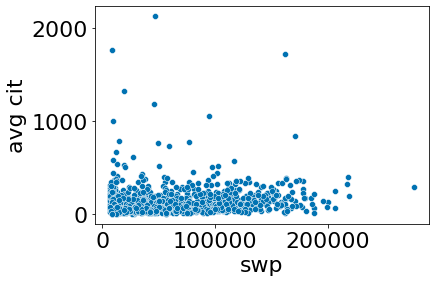

In [46]:
df_cit_and_swp
sns.scatterplot(data=df_cit_and_swp,x='swp',y='avg cit')

In [47]:
def kendall_pval(x,y):
    return stats.kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return stats.pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return stats.spearmanr(x,y)[1]

<AxesSubplot:>

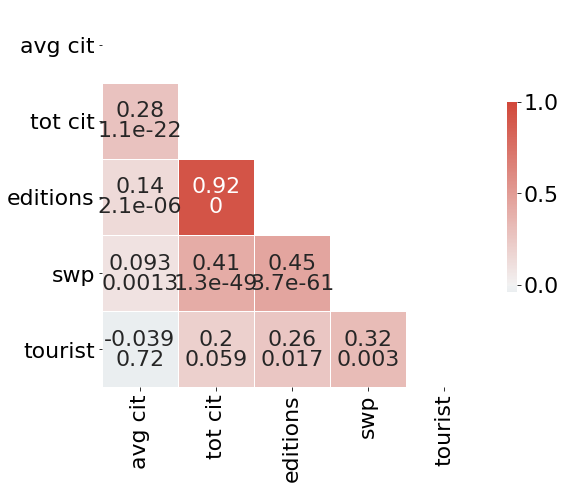

In [48]:
corr_pearson = df_cit_and_swp.corr(method= 'pearson')
p_value = df_cit_and_swp.corr(method= pearsonr_pval)

mask = np.triu(np.ones_like(corr_pearson, dtype=float))

f, ax = plt.subplots(figsize=(9, 7))

cmap = sns.diverging_palette(230, 15, as_cmap=True)

sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va': 'bottom'})

sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar = False, annot = p_value, annot_kws = {'va': 'top'})

<AxesSubplot:>

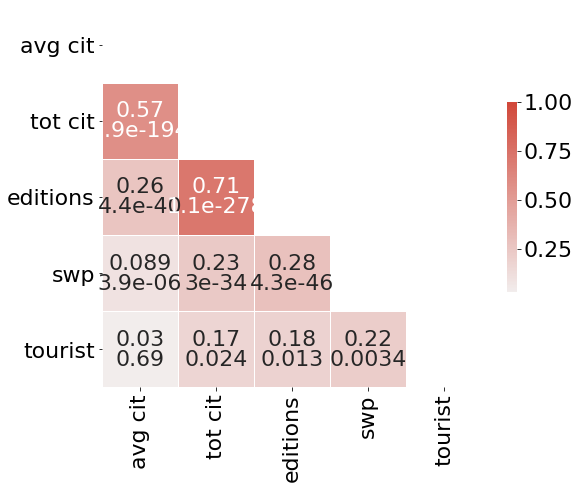

In [49]:
corr_kendall = df_cit_and_swp.corr(method= 'kendall')
p_value = df_cit_and_swp.corr(method = kendall_pval)

mask = np.triu(np.ones_like(corr_kendall, dtype=float))
f, ax = plt.subplots(figsize=(9, 7))
cmap = sns.diverging_palette(230, 15, as_cmap=True)

sns.heatmap(corr_kendall, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va':'bottom'})

sns.heatmap(corr_kendall, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar = False, annot=p_value, annot_kws = {'va':'top'})

<AxesSubplot:>

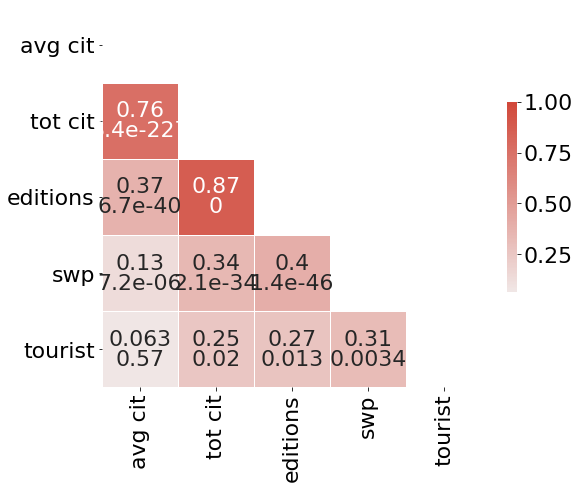

In [50]:
corr_spearman = df_cit_and_swp.corr(method= 'spearman')
p_value = df_cit_and_swp.corr(method = spearmanr_pval)

mask = np.triu(np.ones_like(corr_spearman, dtype=float))
f, ax = plt.subplots(figsize=(9, 7))
cmap = sns.diverging_palette(230, 15, as_cmap=True)

sns.heatmap(corr_spearman, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va':'bottom'})

sns.heatmap(corr_spearman, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar = False, annot=p_value, annot_kws = {'va':'top'})

<AxesSubplot:>

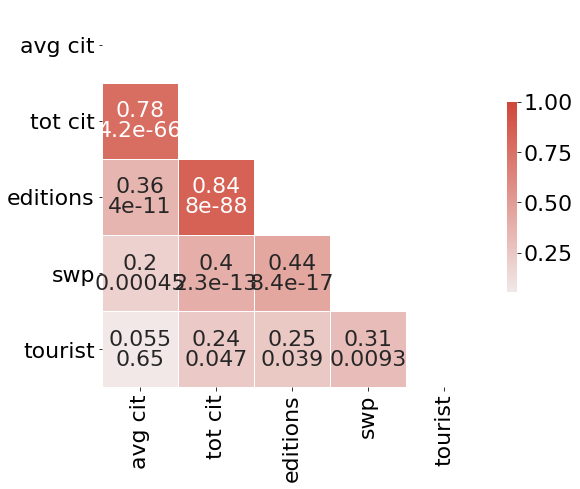

In [51]:
df_for_corr = df_cit_and_swp[df_cit_and_swp['editions']>14]
corr_spearman = df_for_corr.corr(method= 'spearman')
p_value = df_for_corr.corr(method = spearmanr_pval)

mask = np.triu(np.ones_like(corr_spearman, dtype=float))
f, ax = plt.subplots(figsize=(9, 7))
cmap = sns.diverging_palette(230, 15, as_cmap=True)

sns.heatmap(corr_spearman, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va':'bottom'})
sns.heatmap(corr_spearman, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar = False, annot=p_value, annot_kws = {'va':'top'})

<AxesSubplot:>

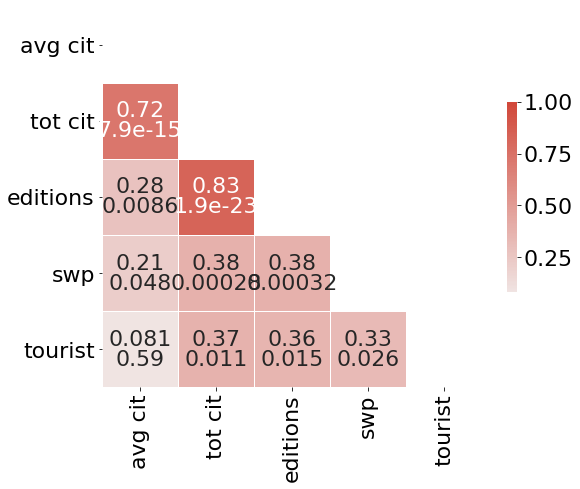

In [52]:
df_for_corr = df_cit_and_swp[df_cit_and_swp['editions']>57]
corr_spearman = df_for_corr.corr(method= 'spearman')
p_value = df_for_corr.corr(method= spearmanr_pval)

mask = np.triu(np.ones_like(corr_spearman, dtype=float))
f, ax = plt.subplots(figsize=(9, 7))
cmap = sns.diverging_palette(230, 15, as_cmap=True)

sns.heatmap(corr_spearman, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va':'bottom'})
sns.heatmap(corr_spearman, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar = False, annot=p_value, annot_kws = {'va':'top'})

          Spearman   tot cit  editions       swp   tourist
avg cit   1.000000  0.717307  0.281654  0.213529  0.081285
tot cit   0.717307  1.000000  0.834480  0.382216  0.371026
editions  0.281654  0.834480  1.000000  0.378757  0.355354
swp       0.213529  0.382216  0.378757  1.000000  0.327176
tourist   0.081285  0.371026  0.355354  0.327176  1.000000
         Spearman   tot cit  editions       swp   tourist
swp      0.213529  0.382216  0.378757  1.000000  0.327176
tourist  0.081285  0.371026  0.355354  0.327176  1.000000
           avg cit  Spearman  editions       swp   tourist
avg cit   1.000000  0.717307  0.281654  0.213529  0.081285
tot cit   0.717307  1.000000  0.834480  0.382216  0.371026
editions  0.281654  0.834480  1.000000  0.378757  0.355354
swp       0.213529  0.382216  0.378757  1.000000  0.327176
tourist   0.081285  0.371026  0.355354  0.327176  1.000000
          avg cit  Spearman  editions       swp   tourist
swp      0.213529  0.382216  0.378757  1.000000  0.327176
to

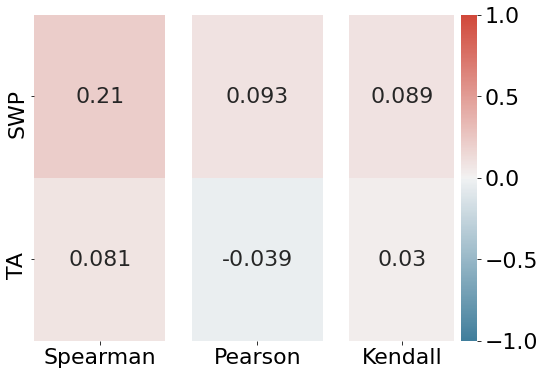

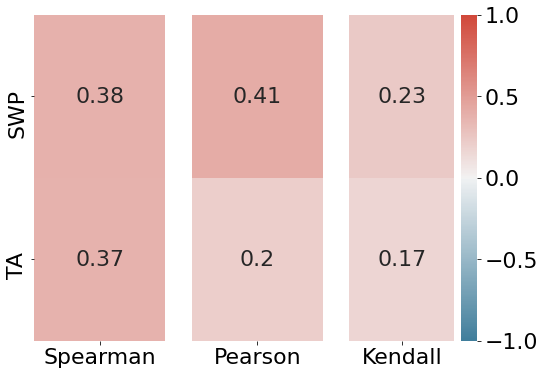

In [53]:
_s = corr_spearman.rename({'avg cit':'Spearman'},axis=1)
_k = corr_kendall.rename({'avg cit':'Kendall'},axis=1)
_p = corr_pearson.rename({'avg cit':'Pearson'},axis=1)

print(_s)

_p.drop(['tot cit','avg cit','editions'], inplace=True)
_s.drop(['tot cit','avg cit','editions'], inplace=True)
_k.drop(['tot cit','avg cit','editions'], inplace=True)
print(_s)
_s.rename({'swp':'SWP','tourist':'TA'}, inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,6))
a = sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
plt.savefig('charts/corr_avg_cit_city.png')




_s = corr_spearman.rename({'tot cit':'Spearman'},axis=1)
_k = corr_kendall.rename({'tot cit':'Kendall'},axis=1)
_p = corr_pearson.rename({'tot cit':'Pearson'},axis=1)

print(_s)

_p.drop(['tot cit','avg cit','editions'], inplace=True)
_s.drop(['tot cit','avg cit','editions'], inplace=True)
_k.drop(['tot cit','avg cit','editions'], inplace=True)
print(_s)
_s.rename({'swp':'SWP','tourist':'TA'}, inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,6))
a = sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
plt.savefig('charts/corr_tot_cit_city.png')

In [54]:
df_sum_cit_by_country = df_single_conference_whit_place.groupby('state')['CIT TOT'].sum()
df_count_cit_by_country = df_single_conference_whit_place.groupby('state')['city'].count()
df_mean_cit_by_country = df_single_conference_whit_place.groupby('state')['CIT TOT'].mean()
dict_cit_by_country = {}
for k,v in df_sum_cit_by_country.items():
    if not(k == 'None'):
        dict_cit_by_country[k] = [df_mean_cit_by_country[k], v, df_count_cit_by_country[k]]
dict_cit_by_country = {k: v for k, v in sorted(dict_cit_by_country.items(), key=lambda item: item[1], reverse=True)}
df_cit_by_country = pd.DataFrame(data = dict_cit_by_country.values(), index = dict_cit_by_country.keys(), columns = ['avg cit', 'tot cit', 'editions'])
df_cit_by_country = df_cit_by_country.sort_values('avg cit', ascending=False)

In [55]:
df_country_index = pd.read_csv(path_file + '/country/country_index.csv').set_index('state')
df_country_index['sum index'] = df_country_index.sum(axis=1)
df_country_index = df_country_index.sort_values('sum index', ascending=False)
df_cit_and_country_index = pd.concat([df_cit_by_country, df_country_index], axis=1).dropna()
df_cit_and_country_index = df_cit_and_country_index.sort_values('editions', ascending=False)
df_cit_and_country_index.head(10)

,avg cit,tot cit,editions,TTCI,TSI,CRBT,GPI,sum index
USA,249.778156,1539133.0,6167.0,5.3,6.6,4.7,4.9,21.5
China,130.448336,223458.0,1714.0,4.9,3.5,7.0,3.9,19.3
Germany,124.612712,168601.0,1356.0,5.4,5.9,6.5,5.7,23.5
Italy,150.486378,187807.0,1252.0,5.1,6.0,6.5,4.7,22.3
France,146.348324,178984.0,1225.0,5.4,5.7,6.8,5.6,23.5
Canada,209.471154,217850.0,1044.0,5.1,6.1,4.0,3.9,19.1
UK,153.199223,157642.0,1029.0,5.2,6.1,5.6,5.4,22.3
Spain,135.636073,127091.0,940.0,5.4,6.6,6.7,5.2,23.9
Japan,137.903664,101635.0,738.0,5.4,5.7,6.5,6.0,23.6
Portugal,99.286765,54012.0,546.0,4.9,6.7,4.1,4.2,19.9


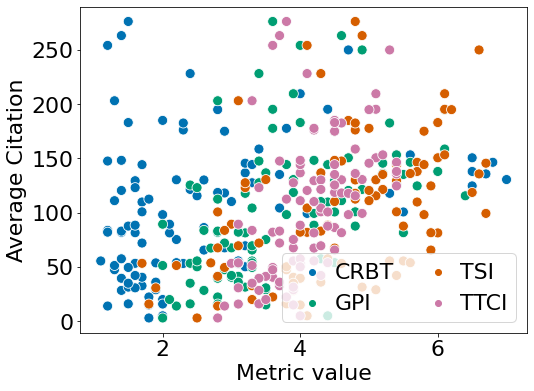

In [56]:
_ = df_cit_and_country_index.copy()
_.rename({'TTCI':'metric'},axis=1,inplace=True)
_.loc[:,'KIND']='TTCI'

__ = df_cit_and_country_index.copy()
__.rename({'TSI':'metric'},axis=1,inplace=True)
__.loc[:,'KIND']='TSI'
_ = _.append(__)

__ = df_cit_and_country_index.copy()
__.rename({'CRBT':'metric'},axis=1,inplace=True)
__.loc[:,'KIND']='CRBT'
_ = _.append(__)

__ = df_cit_and_country_index.copy()
__.rename({'GPI':'metric'},axis=1,inplace=True)
__.loc[:,'KIND']='GPI'
_ = _.append(__)

__ = df_cit_and_country_index.copy()
__.rename({'sum index':'metric'},axis=1,inplace=True)
__.loc[:,'KIND']='SI'
_ = _.append(__)


_['metric'] = _['metric'].round(decimals=1)
#_ = _.groupby(['metric','KIND'],as_index=False).mean()
_.sort_values(['KIND'],inplace=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=_[_['KIND']!='SI'],x='metric',y='avg cit',hue='KIND',s=100)
plt.xlabel('Metric value')
plt.ylabel('Average Citation')


# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:],
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=2, frameon=True)

plt.savefig('charts/cit_vs_metric_without_fit.png')

TTCI = Travel & Tourism Competitiveness Index (min 1, max 7)
TSI = Tourist service infrastructure (min 1, max 7)
CRBT = Cultural resources and business travel (min 1, max 7)
GPI = Ground and port infrastructure (min 1, max 7)

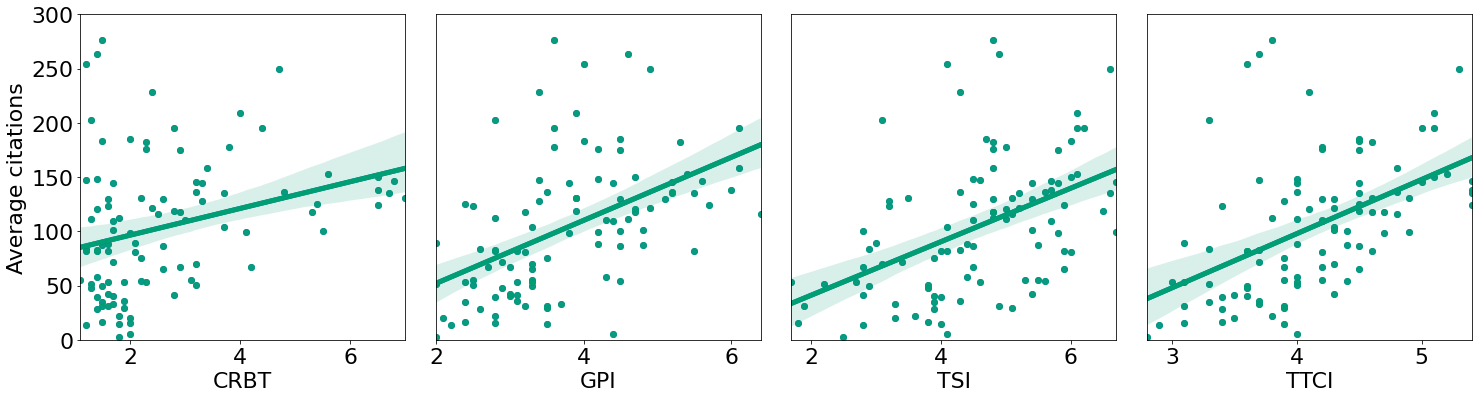

In [66]:
fig,ax = plt.subplots(1,4,figsize=(21,6))
#plt.figure(figsize=(3,6))
sns.regplot(data=_[_['KIND']=='CRBT'],x='metric',y='avg cit',order=1,ci=None,line_kws={'linewidth':5},label='CRBT',ax=ax[0])
sns.regplot(data=_[_['KIND']=='GPI'],x='metric',y='avg cit',order=1,ci=None,line_kws={'linewidth':5},label='GPI',ax=ax[1])
sns.regplot(data=_[_['KIND']=='TSI'],x='metric',y='avg cit',order=1,ci=None,line_kws={'linewidth':5},label='TSI',ax=ax[2])
sns.regplot(data=_[_['KIND']=='TTCI'],x='metric',y='avg cit',order=1,ci=None,line_kws={'linewidth':5},label='TTCI',ax=ax[3])
#sns.regplot(data=_[_['KIND']=='SI'],x='metric',y='avg cit',order=2,ci=None,line_kws={'linewidth':5},label='SI',ax=ax[4])

sns.regplot(data=_[_['KIND']=='CRBT'],x='metric',y='avg cit',order=1,line_kws={'linewidth':5},label='CRBT',ax=ax[0])
sns.regplot(data=_[_['KIND']=='GPI'],x='metric',y='avg cit',order=1,line_kws={'linewidth':5},label='GPI',ax=ax[1])
sns.regplot(data=_[_['KIND']=='TSI'],x='metric',y='avg cit',order=1,line_kws={'linewidth':5},label='TSI',ax=ax[2])
sns.regplot(data=_[_['KIND']=='TTCI'],x='metric',y='avg cit',order=1,line_kws={'linewidth':5},label='TTCI',ax=ax[3])
#sns.regplot(data=_[_['KIND']=='SI'],x='metric',y='avg cit',order=2,line_kws={'linewidth':5},label='SI',ax=ax[4])

ax[0].set_xlabel('CRBT')
ax[1].set_xlabel('GPI')
ax[2].set_xlabel('TSI')
ax[3].set_xlabel('TTCI')
#ax[4].set_xlabel('SI')

ax[0].set_ylabel('Average citations')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
#ax[4].set_ylabel('')

ax[0].set_ylim(0,300)
ax[1].set_ylim(0,300)
ax[2].set_ylim(0,300)
ax[3].set_ylim(0,300)
#ax[4].set_ylim(0,300)

ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
ax[3].yaxis.set_visible(False)
#ax[4].yaxis.set_visible(False)

#plt.legend()

#plt.xlabel('Metric value')
#plt.ylabel('Average Citation')
plt.tight_layout()
plt.savefig('charts/cit_vs_metric_with_fit.png')

In [58]:
_

,avg cit,tot cit,editions,metric,TSI,CRBT,GPI,sum index,KIND,TTCI
Indonesia,69.484848,2293.0,33.0,3.2,3.1,NaN,3.3,13.9,CRBT,4.3
Belgium,135.128834,22026.0,163.0,3.7,5.2,NaN,5.5,18.9,CRBT,4.5
Russia,104.243421,15845.0,152.0,3.7,4.1,NaN,3.3,15.4,CRBT,4.3
Ireland,174.945205,25542.0,146.0,2.9,5.8,NaN,4.5,17.7,CRBT,4.5
Turkey,177.621429,24867.0,142.0,3.8,5.0,NaN,3.6,16.6,CRBT,4.2
...,...,...,...,...,...,...,...,...,...,...
Bosnia and Herzegovina,35.000000,245.0,7.0,3.3,3.9,1.5,2.4,11.1,TTCI,NaN
Nepal,51.333333,308.0,6.0,3.3,2.2,1.3,2.0,8.8,TTCI,NaN
Ecuador,15.000000,90.0,6.0,3.9,4.0,1.8,3.5,13.2,TTCI,NaN
Jordan,47.400000,237.0,5.0,3.6,3.8,1.3,2.9,11.6,TTCI,NaN


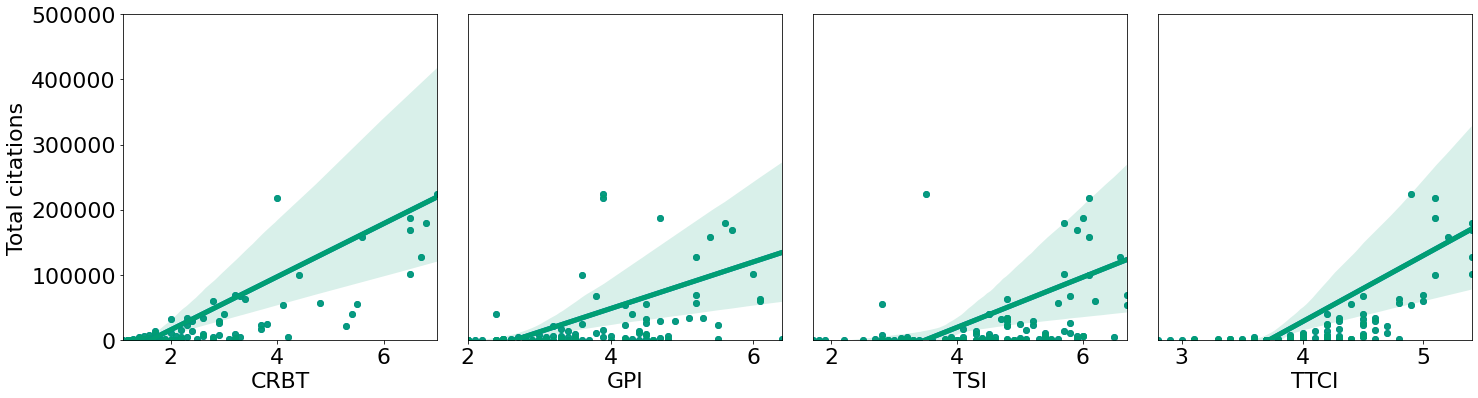

In [64]:
fig,ax = plt.subplots(1,4,figsize=(21,6))
#plt.figure(figsize=(3,6))
sns.regplot(data=_[_['KIND']=='CRBT'],x='metric',y='tot cit',order=1,ci=None,line_kws={'linewidth':5},label='CRBT',ax=ax[0])
sns.regplot(data=_[_['KIND']=='GPI'],x='metric',y='tot cit',order=1,ci=None,line_kws={'linewidth':5},label='GPI',ax=ax[1])
sns.regplot(data=_[_['KIND']=='TSI'],x='metric',y='tot cit',order=1,ci=None,line_kws={'linewidth':5},label='TSI',ax=ax[2])
sns.regplot(data=_[_['KIND']=='TTCI'],x='metric',y='tot cit',order=1,ci=None,line_kws={'linewidth':5},label='TTCI',ax=ax[3])
#sns.regplot(data=_[_['KIND']=='SI'],x='metric',y='avg cit',order=2,ci=None,line_kws={'linewidth':5},label='SI',ax=ax[4])

sns.regplot(data=_[_['KIND']=='CRBT'],x='metric',y='tot cit',order=1,line_kws={'linewidth':5},label='CRBT',ax=ax[0])
sns.regplot(data=_[_['KIND']=='GPI'],x='metric',y='tot cit',order=1,line_kws={'linewidth':5},label='GPI',ax=ax[1])
sns.regplot(data=_[_['KIND']=='TSI'],x='metric',y='tot cit',order=1,line_kws={'linewidth':5},label='TSI',ax=ax[2])
sns.regplot(data=_[_['KIND']=='TTCI'],x='metric',y='tot cit',order=1,line_kws={'linewidth':5},label='TTCI',ax=ax[3])
#sns.regplot(data=_[_['KIND']=='SI'],x='metric',y='avg cit',order=2,line_kws={'linewidth':5},label='SI',ax=ax[4])

ax[0].set_xlabel('CRBT')
ax[1].set_xlabel('GPI')
ax[2].set_xlabel('TSI')
ax[3].set_xlabel('TTCI')
#ax[4].set_xlabel('SI')

ax[0].set_ylabel('Total citations')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
#ax[4].set_ylabel('')

ax[0].set_ylim(0,500000)
ax[1].set_ylim(0,500000)
ax[2].set_ylim(0,500000)
ax[3].set_ylim(0,500000)


ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
ax[3].yaxis.set_visible(False)
#ax[4].yaxis.set_visible(False)

#plt.legend()

#plt.xlabel('Metric value')
#plt.ylabel('Average Citation')
plt.tight_layout()
plt.savefig('charts/totcit_vs_metric_with_fit.png')

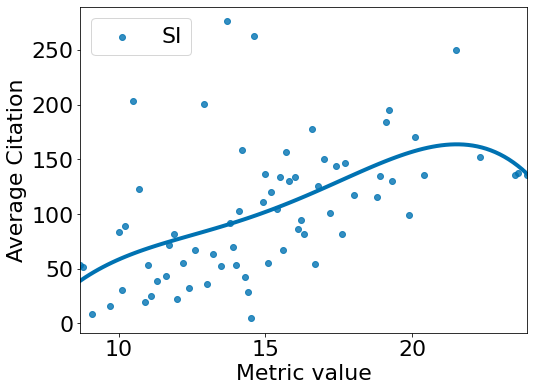

In [62]:
plt.figure(figsize=(8,6))
sns.regplot(data=_[_['KIND']=='SI'],x='metric',y='avg cit',order=4,ci=None,line_kws={'linewidth':4},label='SI')

plt.legend()

plt.xlabel('Metric value')
plt.ylabel('Average Citation')
plt.savefig('charts/cit_vs_SI_with_fit.png')

In [63]:
_.sort_values(['metric'])

,metric,KIND,avg cit,tot cit,editions,TSI,CRBT,GPI,sum index,TTCI
0,1.1,CRBT,55.500000,111.000,2.000000,5.500000,NaN,3.300000,13.800000,3.900000
1,1.2,CRBT,116.233333,195.600,1.800000,3.680000,NaN,3.060000,11.360000,3.420000
2,1.3,CRBT,103.183333,316.250,3.750000,3.525000,NaN,3.075000,11.450000,3.550000
3,1.4,CRBT,102.737502,1331.125,16.500000,4.387500,NaN,3.600000,13.125000,3.737500
4,1.5,CRBT,96.923016,1154.000,10.142857,4.542857,NaN,3.385714,13.271429,3.842857
...,...,...,...,...,...,...,...,...,...,...
209,21.5,SI,249.778156,1539133.000,6167.000000,6.600000,4.70,4.900000,NaN,5.300000
210,22.3,SI,151.842800,172724.500,1140.500000,6.050000,6.05,5.050000,NaN,5.150000
211,23.5,SI,135.480518,173792.500,1290.500000,5.800000,6.65,5.650000,NaN,5.400000
212,23.6,SI,137.903664,101635.000,738.000000,5.700000,6.50,6.000000,NaN,5.400000


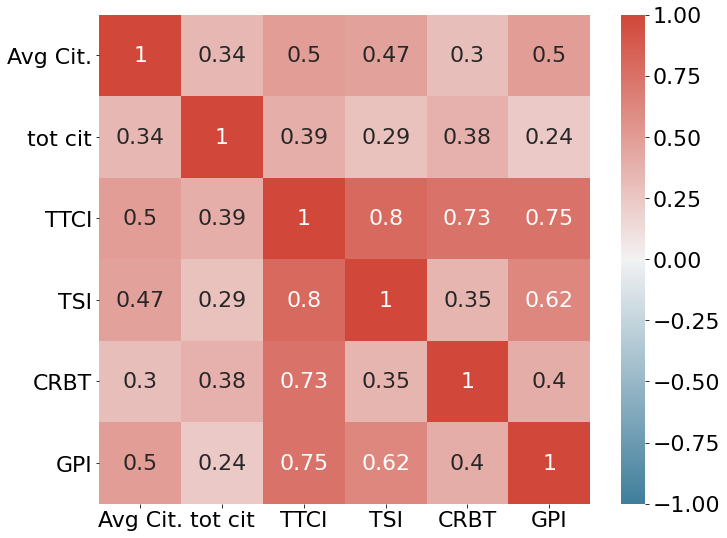

In [64]:
_ = df_cit_and_country_index.drop(['editions','sum index'], axis=1)
_.rename({'avg cit':'Avg Cit.'}, axis=1, inplace=True)
corr_pearson = _.corr(method= 'pearson')
p_value = _.corr(method= pearsonr_pval)

mask = np.triu(np.ones_like(corr_pearson, dtype=float))
f, ax = plt.subplots(figsize=(11, 9))

#sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,  annot_kws = {'va':'bottom'})
sns.heatmap(corr_pearson, annot=True, cmap=cmap, vmin=-1,vmax=1)
#sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
#            square=True, linewidths=.5, cbar = False, annot=p_value, annot_kws = {'va':'top'})
plt.savefig('charts/corr_pearons.png')

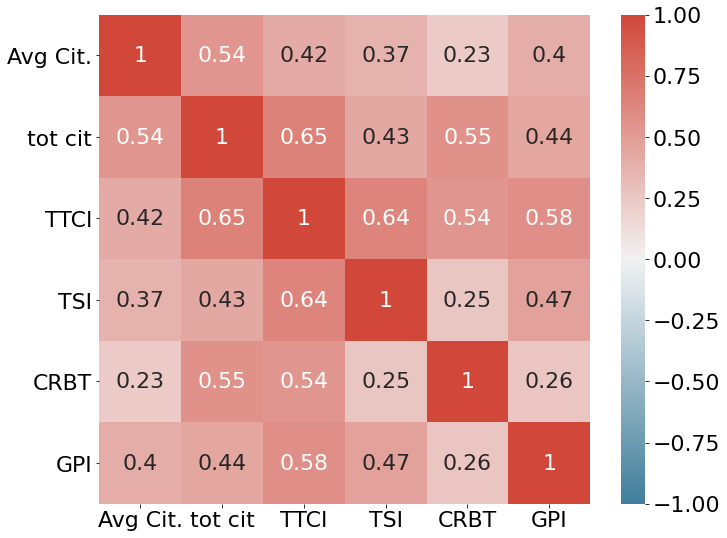

In [65]:
_ = df_cit_and_country_index.drop(['editions','sum index'], axis=1)
_.rename({'avg cit':'Avg Cit.'}, axis=1, inplace=True)
corr_kendall = _.corr(method= 'kendall')
p_value = _.corr(method= pearsonr_pval)

mask = np.triu(np.ones_like(corr_pearson, dtype=float))
f, ax = plt.subplots(figsize=(11, 9))

#sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,  annot_kws = {'va':'bottom'})
sns.heatmap(corr_kendall, annot=True, cmap=cmap, vmin=-1,vmax=1)
#sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
#            square=True, linewidths=.5, cbar = False, annot=p_value, annot_kws = {'va':'top'})

plt.savefig('charts/corr_kendall.png')

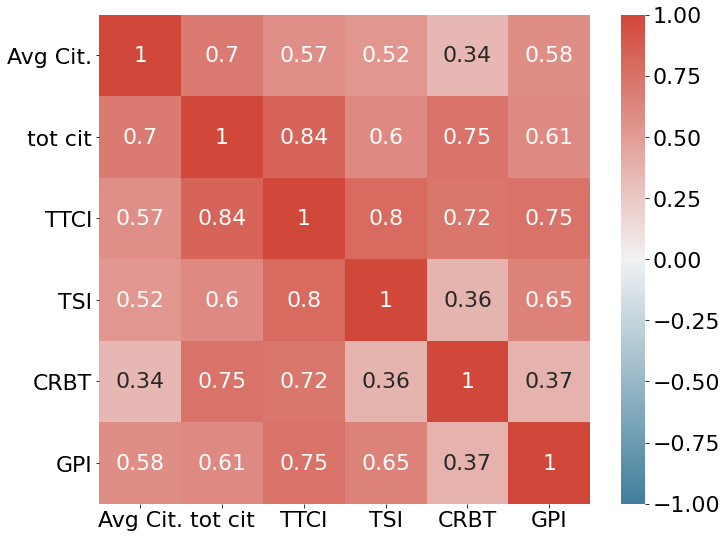

In [66]:
_ = df_cit_and_country_index.drop(['editions','sum index'], axis=1)
_.rename({'avg cit':'Avg Cit.'}, axis=1, inplace=True)
corr_spearman = _.corr(method= 'spearman')
p_value = _.corr(method= pearsonr_pval)

mask = np.triu(np.ones_like(corr_pearson, dtype=float))
f, ax = plt.subplots(figsize=(11, 9))

#sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,  annot_kws = {'va':'bottom'})
sns.heatmap(corr_spearman, annot=True, cmap=cmap, vmin=-1,vmax=1)
#sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=1, center=0,
#            square=True, linewidths=.5, cbar = False, annot=p_value, annot_kws = {'va':'top'})

plt.savefig('charts/corr_spearman.png')

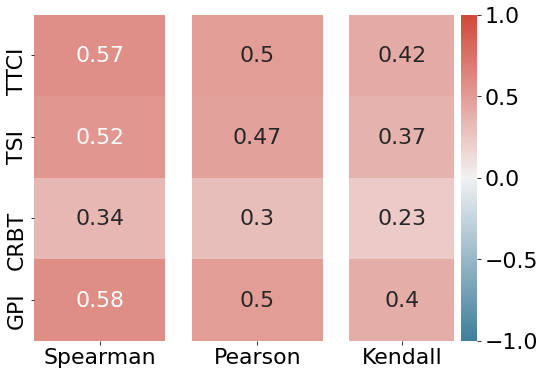

In [67]:
_s = corr_spearman.rename({'Avg Cit.':'Spearman'},axis=1)
_k = corr_kendall.rename({'Avg Cit.':'Kendall'},axis=1)
_p = corr_pearson.rename({'Avg Cit.':'Pearson'},axis=1)

_p.drop(['tot cit'], inplace=True)
_s.drop(['tot cit'], inplace=True)
_k.drop(['tot cit'], inplace=True)
_k.drop(['Avg Cit.'], inplace=True)
_s.drop(['Avg Cit.'], inplace=True)
_p.drop(['Avg Cit.'], inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,6))
a = sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
plt.savefig('charts/corr_avg_cit.png')

In [68]:
_s

,Spearman,tot cit,TTCI,TSI,CRBT,GPI
TTCI,0.574015,0.835813,1.000000,0.795894,0.717048,0.745295
TSI,0.524798,0.603422,0.795894,1.000000,0.361649,0.652175
CRBT,0.340268,0.749671,0.717048,0.361649,1.000000,0.373468
GPI,0.582896,0.608625,0.745295,0.652175,0.373468,1.000000


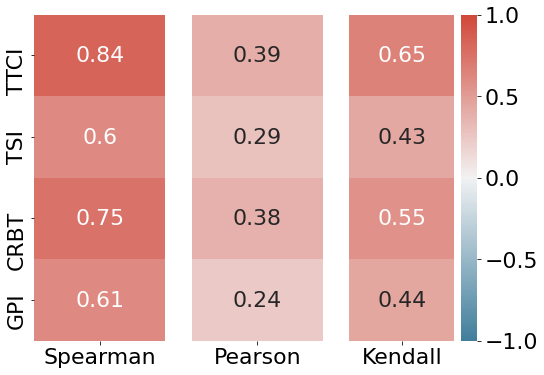

In [69]:
_s = corr_spearman.rename({'tot cit':'Spearman'},axis=1)
_k = corr_kendall.rename({'tot cit':'Kendall'},axis=1)
_p = corr_pearson.rename({'tot cit':'Pearson'},axis=1)

_p.drop(['tot cit'], inplace=True)
_s.drop(['tot cit'], inplace=True)
_k.drop(['tot cit'], inplace=True)
_p.drop(['Avg Cit.'], inplace=True)
_s.drop(['Avg Cit.'], inplace=True)
_k.drop(['Avg Cit.'], inplace=True)

fig,ax = plt.subplots(1,3,figsize=(8,6))
a = sns.heatmap(_s[['Spearman']],ax=ax[0],cmap=cmap,cbar=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_p[['Pearson']],ax=ax[1],cmap=cmap,cbar=False,yticklabels=False,vmin=-1,vmax=1,annot=True)
sns.heatmap(_k[['Kendall']],ax=ax[2],cmap=cmap,yticklabels=False,vmin=-1,vmax=1,annot=True)
plt.savefig('charts/corr_tot_cit.png')

In [71]:
df_year = pd.read_csv(path_file + '/year.csv').set_index('crossref')
def conference_city_corr(conference):
    d_swp = {}
    d_avg_cit = {}
    d_tot_cit = {}
    d = {}
    for crossref,v in df_place_of_conf.iterrows():
        for column,val in v.items():
            if(val==conference):
                if df_place_of_conf.at[crossref,'city'] in list (df_swp.index.values):
                    d_swp[crossref] = df_swp.at[df_place_of_conf.at[crossref,'city'], 'swp']
                    try:
                        d_avg_cit[crossref] = avg_cit_evolution.at[conference, str(df_year.at[crossref, 'year'])]
                        d_tot_cit[crossref] = cit_evolution.at[conference, str(df_year.at[crossref, 'year'])]
                    except KeyError:
                        d['swp-avg_cit'] = 'ERROR: editions < 2'
                        d['swp-avg_cit_pvalue'] = 'ERROR: editions < 2'
                        d['edtions'] = 1
                        return d
    lst_swp = []
    lst_avg_cit = []
    lst_tot_cit = []
    for k,v in d_swp.items():
        if(v != 'None' and d_avg_cit[k] != 'None' and d_tot_cit[k] != 'None'):
            lst_swp.append(v)
            lst_avg_cit.append(d_avg_cit[k])
            lst_tot_cit.append(d_tot_cit[k])
    if len(lst_swp)<2 and len(lst_avg_cit)<2:
        d['swp-avg_cit'] = 'ERROR: len list < 2'
        d['swp-avg_cit_pvalue'] = 'ERROR: len list < 2'
        d['swp-tot_cit'] = 'ERROR: len list < 2'
        d['swp-tot_cit_pvalue'] = 'ERROR: len list < 2'
        d['edtions'] = len(lst_swp)
    elif lst_swp.count(lst_swp[0]) == len(lst_swp):
        d['swp-avg_cit'] = 'ERROR: An input array is constant'
        d['swp-avg_cit_pvalue'] = 'ERROR: An input array is constant'
        d['swp-tot_cit'] = 'ERROR: An input array is constant'
        d['swp-tot_cit_pvalue'] = 'ERROR: An input array is constant'
        d['edtions'] = len(lst_swp)
    else:
        pearson_avg_cit = stats.spearmanr(lst_swp, lst_avg_cit)
        pearson_tot_cit = stats.spearmanr(lst_swp, lst_tot_cit)
        d['swp-avg_cit'] = pearson_avg_cit[0]
        d['swp-avg_cit_pvalue'] = pearson_avg_cit[1]
        d['swp-tot_cit'] = pearson_tot_cit[0]
        d['swp-tot_cit_pvalue'] = pearson_tot_cit[1]
        d['edtions'] = len(lst_swp)
    return d

In [72]:
if no_exe:
    d = {}
    for conf in avg_cit_evolution.index.values:
        d[conf] = conference_city_corr(conf) 
    lst = []
    for k,v in d.items():
        val = d[k].values()
        key = d[k].keys()
        lst.append(pd.DataFrame(data = [val], index = [k], columns = key))
    df_conf_corr = pd.concat(lst)
    df_conf_corr.to_csv(path_file + '/corr_city_conf_kendall.csv')

In [73]:
def conference_state_corr(conference):
    d = {}
    d_avg_cit = {}
    d_tot_cit = {}
    d_country_ttci = {}
    d_country_index = {}
    for crossref,v in df_place_of_conf.iterrows():
        for column,val in v.items():
            if(val==conference):
                if df_place_of_conf.at[crossref,'state'] in list (df_cit_and_country_index.index.values):
                    d_country_index[crossref] = df_cit_and_country_index.at[df_place_of_conf.at[crossref,'state'], 'sum index']
                    d_country_ttci[crossref] = df_cit_and_country_index.at[df_place_of_conf.at[crossref,'state'], 'TTCI']
                    try:
                        d_avg_cit[crossref] = avg_cit_evolution.at[conference, str(df_year.at[crossref, 'year'])]
                        d_tot_cit[crossref] = cit_evolution.at[conference, str(df_year.at[crossref, 'year'])]
                    except KeyError:
                        d['si-avg_cit'] = 'ERROR: len list < 2'
                        d['si-avg_cit_pvalue'] = 'ERROR: len list < 2'
                        d['si-tot_cit'] = 'ERROR: len list < 2'
                        d['si-tot_cit_pvalue'] = 'ERROR: len list < 2'
                        d['ttci-avg_cit'] = 'ERROR: len list < 2'
                        d['ttci-avg_cit_pvalue'] = 'ERROR: len list < 2'
                        d['ttci-tot_cit'] = 'ERROR: len list < 2'
                        d['ttci-tot_cit_pvalue'] = 'ERROR: len list < 2'
                        d['edtions'] = 1
                        return d
    lst_si = []
    lst_avg_cit = []
    lst_tot_cit = []
    lst_ttci = []
    for k,v in d_country_index.items():
        if(v != 'None' and d_avg_cit[k] != 'None' and d_tot_cit[k] != 'None' and d_country_ttci[k] != 'None'):
            lst_si.append(v)
            lst_ttci.append(d_country_ttci[k])
            lst_avg_cit.append(d_avg_cit[k])
            lst_tot_cit.append(d_tot_cit[k])
    if len(lst_si)<2 or len(lst_avg_cit)<2 or len(lst_ttci)<2:
        d['si-avg_cit'] = 'ERROR: len list < 2'
        d['si-avg_cit_pvalue'] = 'ERROR: len list < 2'
        d['si-tot_cit'] = 'ERROR: len list < 2'
        d['si-tot_cit_pvalue'] = 'ERROR: len list < 2'
        d['ttci-avg_cit'] = 'ERROR: len list < 2'
        d['ttci-avg_cit_pvalue'] = 'ERROR: len list < 2'
        d['ttci-tot_cit'] = 'ERROR: len list < 2'
        d['ttci-tot_cit_pvalue'] = 'ERROR: len list < 2'
        d['edtions'] = len(lst_si)
    elif lst_si.count(lst_si[0]) == len(lst_si):
        d['si-avg_cit'] = 'ERROR: An input array is constant'
        d['si-avg_cit_pvalue'] = 'ERROR: An input array is constant'
        d['si-tot_cit'] = 'ERROR: An input array is constant'
        d['si-tot_cit_pvalue'] = 'ERROR: An input array is constant'
        d['ttci-avg_cit'] = 'ERROR: An input array is constant'
        d['ttci-avg_cit_pvalue'] = 'ERROR: An input array is constant'
        d['ttci-tot_cit'] = 'ERROR: An input array is constant'
        d['ttci-tot_cit_pvalue'] = 'ERROR: An input array is constant'
        d['edtions'] = len(lst_si)
    else:
        si_avg_cit = stats.spearmanr(lst_si, lst_avg_cit)
        si_tot_cit = stats.spearmanr(lst_si, lst_tot_cit)
        ttci_avg_cit = stats.spearmanr(lst_ttci, lst_avg_cit)
        ttci_tot_cit = stats.spearmanr(lst_ttci, lst_tot_cit)
        d['si-avg_cit'] = si_avg_cit[0]
        d['si-avg_cit_pvalue'] = si_avg_cit[1]
        d['si-tot_cit'] = si_tot_cit[0]
        d['si-tot_cit_pvalue'] = si_tot_cit[1]
        d['ttci-avg_cit'] = ttci_avg_cit[0]
        d['ttci-avg_cit_pvalue'] = ttci_avg_cit[1]
        d['ttci-tot_cit'] = ttci_tot_cit[0]
        d['ttci-tot_cit_pvalue'] = ttci_tot_cit[1]
        d['edtions'] = len(lst_si)
    return d

In [77]:
if no_exe:
    print('start')
    c = 0
    conf_state_corr = {}
    conf_city_corr = {}
    for conf in avg_cit_evolution.index.values:
        conf_state_corr[conf] = conference_state_corr(conf)
        conf_city_corr[conf] = conference_city_corr(conf)
        c+=1
        if c%100==0:
            print(c)
    lst = []
    for k,v in conf_state_corr.items():
        val = conf_state_corr[k].values()
        key = conf_state_corr[k].keys()
        lst.append(pd.DataFrame(data = [val], index = [k], columns = key))
    df_conf_state_corr = pd.concat(lst)
    df_conf_state_corr.to_csv(path_file + '/corr_state_conf_spearman.csv')

In [78]:
if no_exe:
    lst = []
    for k,v in conf_city_corr.items():
        val = conf_city_corr[k].values()
        key = conf_city_corr[k].keys()
        lst.append(pd.DataFrame(data = [val], index = [k], columns = key))
    df_conf_corr = pd.concat(lst)
    df_conf_corr.to_csv(path_file + '/corr_city_conf_spearman.csv')

In [79]:
df_corr_city_conf_pearson = pd.read_csv(path_file + '/corr_city_conf_pearson.csv').set_index('cod')
df_corr_city_conf_pearson

,swp-avg_cit,swp-avg_cit(pvalue),swp-tot_cit,swp-tot_cit(pvalue),edtions
cod,,,,,
3dic,0.399318,0.374825,0.452581,0.307882,7
3dim,0.425876,0.399806,0.395707,0.437420,6
3dor,-0.426333,0.474100,-0.373070,0.536254,5
3dpvt,-0.683446,0.520961,-0.670964,0.531761,3
3dtv,-0.458538,0.360398,-0.048600,0.927157,6
...,...,...,...,...,...
xps,-1.000000,1.000000,-1.000000,1.000000,2
xpu,0.389855,0.516498,-0.813591,0.093864,5
xsede,-0.226593,0.773407,0.661606,0.338394,4


In [80]:
df_corr_city_conf_pearson.mean()

swp-avg_cit           -0.002455
swp-avg_cit(pvalue)    0.559152
swp-tot_cit           -0.000709
swp-tot_cit(pvalue)    0.546313
edtions                9.483775
dtype: float64

In [81]:
df_corr_city_conf_pearson.mode()

,swp-avg_cit,swp-avg_cit(pvalue),swp-tot_cit,swp-tot_cit(pvalue),edtions
0,1.0,1.0,-1.0,1.0,2


In [82]:
df_corr_state_conf_pearson = pd.read_csv(path_file + '/corr_state_conf_pearson.csv').set_index('cod')
df_corr_state_conf_pearson

,si-avg_cit,si-avg_cit(pvalue),si-tot_cit,si-tot_cit(pvalue),ttci-avg_cit,ttci-avg_cit(pvalue),ttci-tot_cit,ttci-tot_cit(pvalue),edtions
cod,,,,,,,,,
3dic,0.023147,0.960715,0.098767,0.833144,0.147995,0.751498,0.237531,0.608033,7
3dor,0.564030,0.321995,0.469237,0.425262,0.538034,0.349614,0.480384,0.412770,5
3dpvt,0.307003,0.801348,0.290813,0.812148,0.649834,0.549677,0.636847,0.560477,3
3dtv,0.140747,0.790274,-0.371602,0.468254,0.065341,0.902127,-0.409995,0.419467,6
3dui,-0.308158,0.356559,-0.249619,0.459151,-0.308158,0.356559,-0.249619,0.459151,11
...,...,...,...,...,...,...,...,...,...
wwic,0.155977,0.594396,0.207600,0.476362,0.193796,0.506785,0.222298,0.444958,14
www,-0.124704,0.489281,0.115500,0.522134,-0.107324,0.552192,0.102494,0.570319,33
xpu,-0.404797,0.499040,-0.980710,0.003207,-0.404797,0.499040,-0.980710,0.003207,5


In [83]:
df_corr_state_conf_pearson.mean()

si-avg_cit              0.014257
si-avg_cit(pvalue)      0.558498
si-tot_cit              0.026391
si-tot_cit(pvalue)      0.547332
ttci-avg_cit            0.014392
ttci-avg_cit(pvalue)    0.553050
ttci-tot_cit            0.023119
ttci-tot_cit(pvalue)    0.542873
edtions                 9.994076
dtype: float64

In [84]:
df_corr_state_conf_pearson.mode()

,si-avg_cit,si-avg_cit(pvalue),si-tot_cit,si-tot_cit(pvalue),ttci-avg_cit,ttci-avg_cit(pvalue),ttci-tot_cit,ttci-tot_cit(pvalue),edtions
0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,2


In [85]:
df_corr_city_conf_kendall = pd.read_csv(path_file + '/corr_city_conf_kendall.csv').set_index('cod')
df_corr_city_conf_kendall

,swp-avg_cit,swp-avg_cit(pvalue),swp-tot_cit,swp-tot_cit(pvalue),edtions
cod,,,,,
3dic,0.205738,0.530495,0.411476,0.209660,7
3dim,0.447214,0.227016,0.447214,0.227016,6
3dor,-0.447214,0.296270,-0.516398,0.248213,5
3dpvt,-0.333333,1.000000,-0.333333,1.000000,3
3dtv,-0.333333,0.469444,-0.276026,0.444217,6
...,...,...,...,...,...
xps,-1.000000,1.000000,-1.000000,1.000000,2
xpu,0.000000,1.000000,-1.000000,0.026888,5
xsede,0.000000,1.000000,0.666667,0.333333,4


In [86]:
df_corr_city_conf_kendall.mean()

swp-avg_cit           -0.206524
swp-avg_cit(pvalue)    0.609878
swp-tot_cit           -0.002459
swp-tot_cit(pvalue)    0.590541
edtions                9.454507
dtype: float64

In [87]:
df_corr_city_conf_kendall.mode()

,swp-avg_cit,swp-avg_cit(pvalue),swp-tot_cit,swp-tot_cit(pvalue),edtions
0,1.0,1.0,-1.0,1.0,2


In [88]:
df_corr_state_conf_kendall = pd.read_csv(path_file + '/corr_state_conf_kendall.csv').set_index('cod')
df_corr_state_conf_kendall

,si-avg_cit,si-avg_cit_pvalue,si-tot_cit,si-tot_cit_pvalue,ttci-avg_cit,ttci-avg_cit_pvalue,ttci-tot_cit,ttci-tot_cit_pvalue,edtions
cod,,,,,,,,,
3dic,-0.158777,0.633839,0.052926,0.873845,-0.056344,0.869417,0.169031,0.621873,7
3dor,0.223607,0.601508,0.258199,0.563703,0.353553,0.420457,0.408248,0.374259,5
3dpvt,-0.333333,1.000000,-0.333333,1.000000,0.333333,1.000000,0.333333,1.000000,3
3dtv,0.200000,0.719444,0.000000,1.000000,0.200000,0.719444,0.000000,1.000000,6
3dui,-0.341121,0.205903,-0.341121,0.205903,-0.341121,0.205903,-0.341121,0.205903,11
...,...,...,...,...,...,...,...,...,...
wwic,-0.079592,0.698682,0.068599,0.739681,0.023739,0.910326,0.155158,0.463512,14
www,0.054224,0.672624,0.090373,0.481278,0.008327,0.949540,0.079109,0.547706,33
xpu,-0.288675,0.542802,-0.866025,0.067889,-0.288675,0.542802,-0.866025,0.067889,5


In [89]:
df_corr_state_conf_kendall.mean()

si-avg_cit             0.005213
si-avg_cit_pvalue      0.577479
si-tot_cit             0.021405
si-tot_cit_pvalue      0.558305
ttci-avg_cit           0.002562
ttci-avg_cit_pvalue    0.554138
ttci-tot_cit           0.020560
ttci-tot_cit_pvalue    0.540976
edtions                9.989774
dtype: float64

In [90]:
df_corr_state_conf_kendall.mode()

,si-avg_cit,si-avg_cit_pvalue,si-tot_cit,si-tot_cit_pvalue,ttci-avg_cit,ttci-avg_cit_pvalue,ttci-tot_cit,ttci-tot_cit_pvalue,edtions
0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,2.0
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [91]:
df_corr_city_conf_spearman = pd.read_csv(path_file + '/corr_city_conf_spearman.csv').set_index('cod')
df_corr_city_conf_spearman

,swp-avg_cit,swp-avg_cit_pvalue,swp-tot_cit,swp-tot_cit_pvalue,edtions
cod,,,,,
3dic,0.259437,0.574237,0.370625,0.413116,7
3dim,0.576818,0.230732,0.576818,0.230732,6
3dor,-0.579751,0.305575,-0.577350,0.308068,5
3dpvt,-0.500000,0.666667,-0.500000,0.666667,3
3dtv,-0.542857,0.265703,-0.289886,0.577352,6
...,...,...,...,...,...
xps,-1.000000,NaN,-1.000000,NaN,2
xpu,0.111111,0.858821,-1.000000,0.000000,5
xsede,0.200000,0.800000,0.800000,0.200000,4


In [92]:
df_corr_city_conf_spearman.mean()

swp-avg_cit          -0.004595
swp-avg_cit_pvalue    2.935775
swp-tot_cit          -0.072971
swp-tot_cit_pvalue    1.872372
edtions               9.454507
dtype: float64

In [93]:
df_corr_city_conf_spearman.mode()

,swp-avg_cit,swp-avg_cit_pvalue,swp-tot_cit,swp-tot_cit_pvalue,edtions
0,1.0,0.666667,-1.0,0.666667,2


In [94]:
df_corr_state_conf_spearman = pd.read_csv(path_file + '/corr_state_conf_spearman.csv').set_index('cod')
df_corr_state_conf_spearman

,si-avg_cit,si-avg_cit_pvalue,si-tot_cit,si-tot_cit_pvalue,ttci-avg_cit,ttci-avg_cit_pvalue,ttci-tot_cit,ttci-tot_cit_pvalue,edtions
cod,,,,,,,,,
3dic,-0.243256,0.599144,0.168408,0.718138,-0.115728,0.804848,0.270031,0.558110,7
3dor,0.368932,0.541146,0.288675,0.637618,0.486664,0.405772,0.444262,0.453549,5
3dpvt,-0.500000,0.666667,-0.500000,0.666667,0.500000,0.666667,0.500000,0.666667,3
3dtv,0.314286,0.544093,0.000000,1.000000,0.314286,0.544093,0.000000,1.000000,6
3dui,-0.400000,0.222868,-0.400000,0.222868,-0.400000,0.222868,-0.400000,0.222868,11
...,...,...,...,...,...,...,...,...,...
wwic,-0.117390,0.689401,0.140801,0.631145,0.067510,0.818628,0.247811,0.392986,14
www,0.074882,0.678755,0.101331,0.574725,0.048494,0.788704,0.077420,0.668475,33
xpu,-0.304290,0.618630,-0.912871,0.030466,-0.304290,0.618630,-0.912871,0.030466,5


In [95]:
df_corr_state_conf_spearman.mean()

si-avg_cit             0.004002
si-avg_cit_pvalue      0.927775
si-tot_cit             0.023385
si-tot_cit_pvalue      0.911132
ttci-avg_cit           0.003879
ttci-avg_cit_pvalue    0.480180
ttci-tot_cit           0.022847
ttci-tot_cit_pvalue    0.906288
edtions                9.989774
dtype: float64

In [96]:
df_corr_state_conf_spearman.mode()

,si-avg_cit,si-avg_cit_pvalue,si-tot_cit,si-tot_cit_pvalue,ttci-avg_cit,ttci-avg_cit_pvalue,ttci-tot_cit,ttci-tot_cit_pvalue,edtions
0,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.333333,2


In [99]:
dict_ratio = df_ratio.to_dict()
for k,v in dict_ratio.items():
    for k2,v2 in v.items():
        if v2>=10 and k != 'tot avg':
            print(k2,k)

ispw 1985
sigdoc 1986
ecai 1996
spw 1997
wmcsa 1999
cscw 2000
siggraph 2000
middleware 2001
siggraph 2001
ccia 2002
egve 2006
sbm 2013
